In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("vgsales_clean.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Num_Platforms,Exclusive
0,256,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,2,0
1,541,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,2,0
2,1743,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15,1,1
3,1945,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05,4,0
4,2622,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           16327 non-null  int64  
 1   Name           16327 non-null  object 
 2   Platform       16327 non-null  object 
 3   Year           16327 non-null  int64  
 4   Genre          16327 non-null  object 
 5   Publisher      16327 non-null  object 
 6   NA_Sales       16327 non-null  float64
 7   EU_Sales       16327 non-null  float64
 8   JP_Sales       16327 non-null  float64
 9   Other_Sales    16327 non-null  float64
 10  Global_Sales   16327 non-null  float64
 11  Num_Platforms  16327 non-null  int64  
 12  Exclusive      16327 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 1.6+ MB


# How do Exclusive games perform in comparison to Multi-platform games Globally?

In [5]:
name_platform_counts = df.groupby("Name")["Platform"].nunique()
multi_platform_games = name_platform_counts[name_platform_counts > 1].index
num_multi_platform_games = len(multi_platform_games)
print(f"Number of multi-platformed games:", num_multi_platform_games)

Number of multi-platformed games: 2717


In [6]:
single_platform_games = name_platform_counts[name_platform_counts == 1].index
num_single_platform_games = len(single_platform_games)
print(f"Number of exclusive games:", num_single_platform_games)

Number of exclusive games: 8643


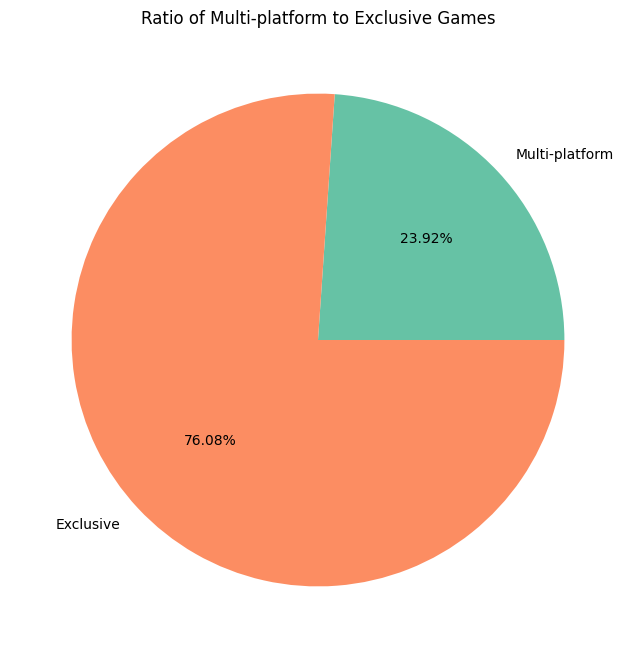

In [7]:
counts = [num_multi_platform_games, num_single_platform_games]
labels = ["Multi-platform", "Exclusive"]

plt.figure(figsize=(10,8))
plt.pie(counts, labels=labels, autopct="%1.2f%%", colors=sns.color_palette("Set2"))
plt.title("Ratio of Multi-platform to Exclusive Games")
plt.show()

## Has Multi-platform games achieved Higher Total Global Sales than Exclusive games?

In [8]:
total_games_sales = df["Global_Sales"].sum()
print(f"Total global sales of all games: ${total_games_sales:.2f} million\n")

total_multi_platform_sales = df[df["Exclusive"] == 0]["Global_Sales"].sum()
print(f"Total global sales of multi-platform games: ${total_multi_platform_sales:.2f} million")

average_multi_platform_sales = total_multi_platform_sales/num_multi_platform_games
print(f"Average global sales of multi-platform games: ${average_multi_platform_sales:.2f} million")

total_single_platform_sales = df[df["Exclusive"] == 1]["Global_Sales"].sum()
print(f"Total global sales of single-platform games: ${total_single_platform_sales:.2f} million")

average_single_platform_sales = total_single_platform_sales/num_single_platform_games
print(f"Average global sales of single-platform games: ${average_single_platform_sales:.2f} million")

Total global sales of all games: $8820.32 million

Total global sales of multi-platform games: $4603.98 million
Average global sales of multi-platform games: $1.69 million
Total global sales of single-platform games: $4216.34 million
Average global sales of single-platform games: $0.49 million


In [9]:
#Confirming total sales
total_sales_check = total_multi_platform_sales + total_single_platform_sales
if total_sales_check == total_games_sales:
    print(f"Total global sales check: ${total_multi_platform_sales + total_single_platform_sales} million")
    print("TOTAL GLOBAL SALES ARE ACCURATE")
else:
    print("Total global sales check does not add up!")

Total global sales check: $8820.32 million
TOTAL GLOBAL SALES ARE ACCURATE


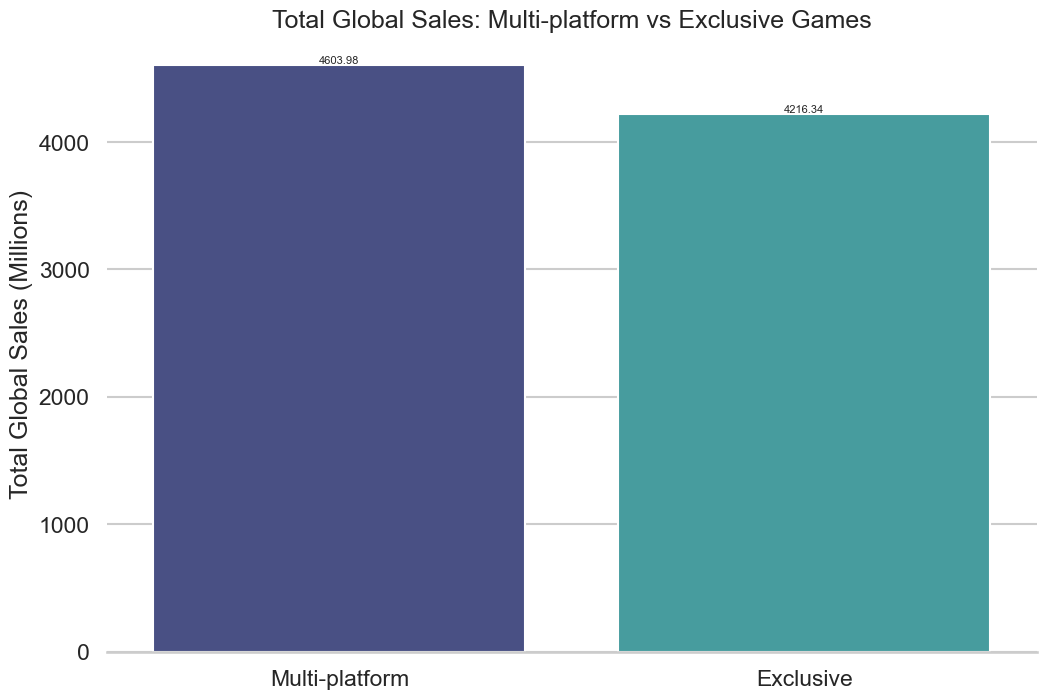

In [10]:
categories = ["Multi-platform", "Exclusive"]
total_sales = [total_multi_platform_sales, total_single_platform_sales]

sns.set_style("whitegrid")
sns.set_context("talk")

ax = plt.subplots(figsize=(12, 8))

ax = sns.barplot(x=categories, y=total_sales, hue=categories, palette="mako", errorbar=None)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.xticks([0, 1], ["Multi-platform", "Exclusive"])
plt.ylabel("Total Global Sales (Millions)")
plt.xlabel("")
plt.title("Total Global Sales: Multi-platform vs Exclusive Games")
plt.show()

* **Observation:** Multi-Platform games accumulated $387.64 Million more than Exclusive games.

* **Interpretation:** Multi-Platform games are able to reach a wider audience, which can bring about higher revenue.

* **Insight:** Multi-Platform games perform marginally better in the amount of revenue they generate as compared to Exclusive games. This suggests that game availability on a wider array of platforms positively affects global sales performance.

## Has Multi-platform games achieved Higher Average Global Sales than Exclusive games?

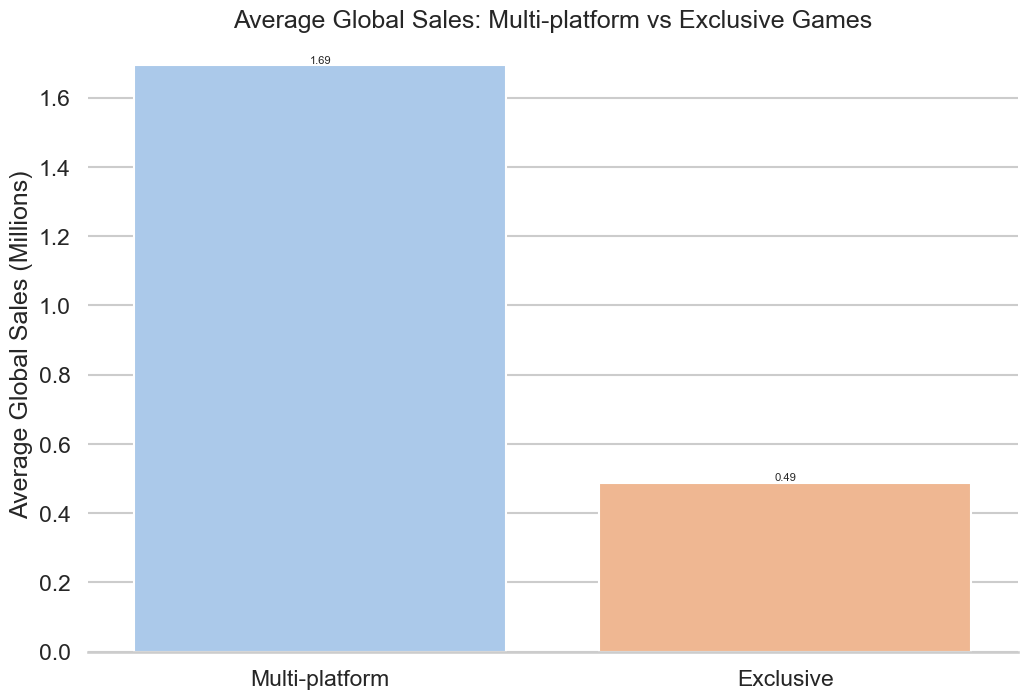

In [11]:
categories = ["Multi-platform", "Exclusive"]
average_sales = [average_multi_platform_sales, average_single_platform_sales]

sns.set_style("whitegrid")
sns.set_context("talk")

ax = plt.subplots(figsize=(12, 8))

ax = sns.barplot(x=categories, y=average_sales, hue=categories, palette="pastel", errorbar=None)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.xticks([0, 1], ["Multi-platform", "Exclusive"])
plt.ylabel("Average Global Sales (Millions)")
plt.xlabel("")
plt.title("Average Global Sales: Multi-platform vs Exclusive Games")
plt.show()

* **Observation:** Multi-Platform games on average achieve 1.2 million sales greater than Exclusive games

* **Interpretation:** Multi-Platform games are able to reach a wider audience, which drives higher per-game sales

* **Insight:** Individual game sales performance is positively affected from being accessible on multiple platforms

# Do games generate greater Global Sales if they are on Multiple Platforms?

In [12]:
sales_per_num_platforms = df.groupby("Num_Platforms", as_index = False)["Global_Sales"].sum()
sales_per_num_platforms = sales_per_num_platforms.sort_values("Num_Platforms")
print(sales_per_num_platforms)

   Num_Platforms  Global_Sales
0              1       4216.34
1              2       1518.87
2              3       1132.94
3              4        733.97
4              5        534.47
5              6        391.27
6              7        151.37
7              8         95.55
8              9         31.46
9             10         14.08


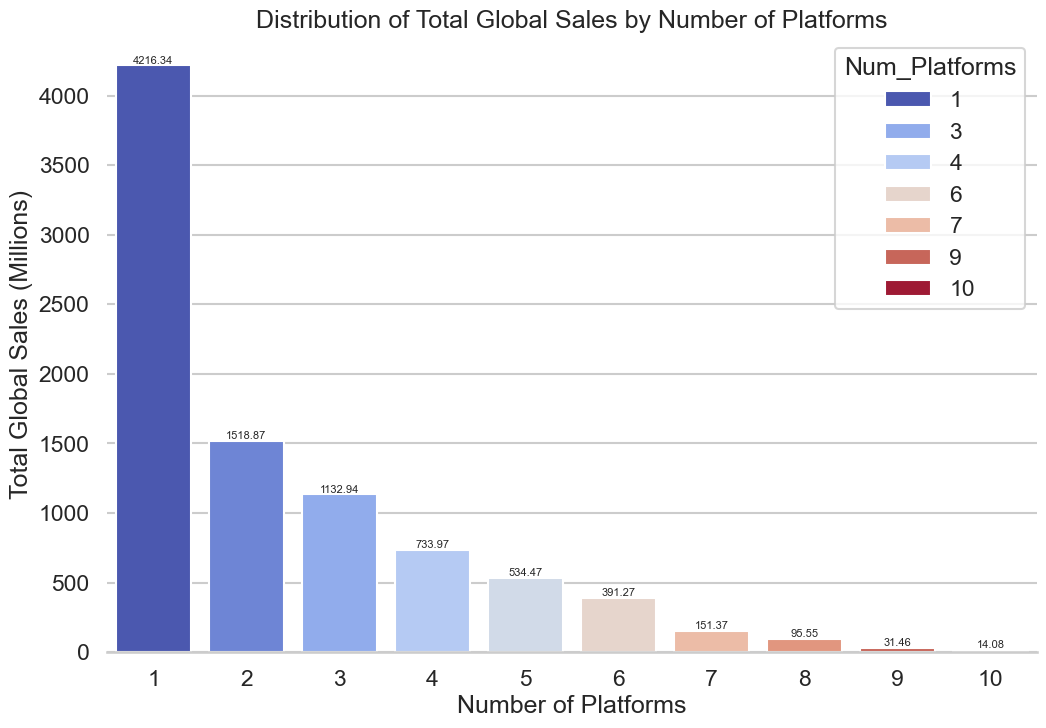

In [13]:
platform_categories = list(range(df["Num_Platforms"].min(), df["Num_Platforms"].max() + 1))
df["Num_Platforms"] = pd.Categorical(df["Num_Platforms"], categories = platform_categories, ordered = True)

sns.set_style("whitegrid")
sns.set_context("talk")

ax = plt.subplots(figsize=(12, 8))

ax = sns.barplot(data = sales_per_num_platforms,  x = "Num_Platforms", y= "Global_Sales", hue = "Num_Platforms", palette= "coolwarm")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.ylabel("Total Global Sales (Millions)")
plt.xlabel("Number of Platforms")
plt.title("Distribution of Total Global Sales by Number of Platforms")
plt.show()

* **Observation:** Exclusive games (games on 1 platform) generated the highest number of total sales at $4216.34 million. The total sales gradually decrease the more platforms a game is available on. 

* **Interpretation:** Majority of games are exclusive, so single platform games will have a significantly greater number of total sales

* **Insight:** Publishing a game on as much platforms as possible does not automatically guarantee higher total revenue

In [14]:
unique_games = df[["Name", "Num_Platforms"]].drop_duplicates()
num_games_per_platform = unique_games.groupby("Num_Platforms", observed = False)["Name"].count().reset_index()
num_games_per_platform.columns = ["Num_Platforms", "Num_Unique_Games"]
print(num_games_per_platform)

  Num_Platforms  Num_Unique_Games
0             1              8643
1             2              1482
2             3               689
3             4               280
4             5               134
5             6                86
6             7                29
7             8                13
8             9                 3
9            10                 1


In [15]:
sales_per_num_platforms = sales_per_num_platforms.merge(num_games_per_platform, on = "Num_Platforms")
print(sales_per_num_platforms)

  Num_Platforms  Global_Sales  Num_Unique_Games
0             1       4216.34              8643
1             2       1518.87              1482
2             3       1132.94               689
3             4        733.97               280
4             5        534.47               134
5             6        391.27                86
6             7        151.37                29
7             8         95.55                13
8             9         31.46                 3
9            10         14.08                 1


In [16]:
sales_per_num_platforms["Avg_Sales_Per_Game"] = sales_per_num_platforms["Global_Sales"] / sales_per_num_platforms["Num_Unique_Games"]
sales_per_num_platforms = sales_per_num_platforms.sort_values("Avg_Sales_Per_Game", ascending = False)
print(sales_per_num_platforms)

  Num_Platforms  Global_Sales  Num_Unique_Games  Avg_Sales_Per_Game
9            10         14.08                 1           14.080000
8             9         31.46                 3           10.486667
7             8         95.55                13            7.350000
6             7        151.37                29            5.219655
5             6        391.27                86            4.549651
4             5        534.47               134            3.988582
3             4        733.97               280            2.621321
2             3       1132.94               689            1.644325
1             2       1518.87              1482            1.024879
0             1       4216.34              8643            0.487833


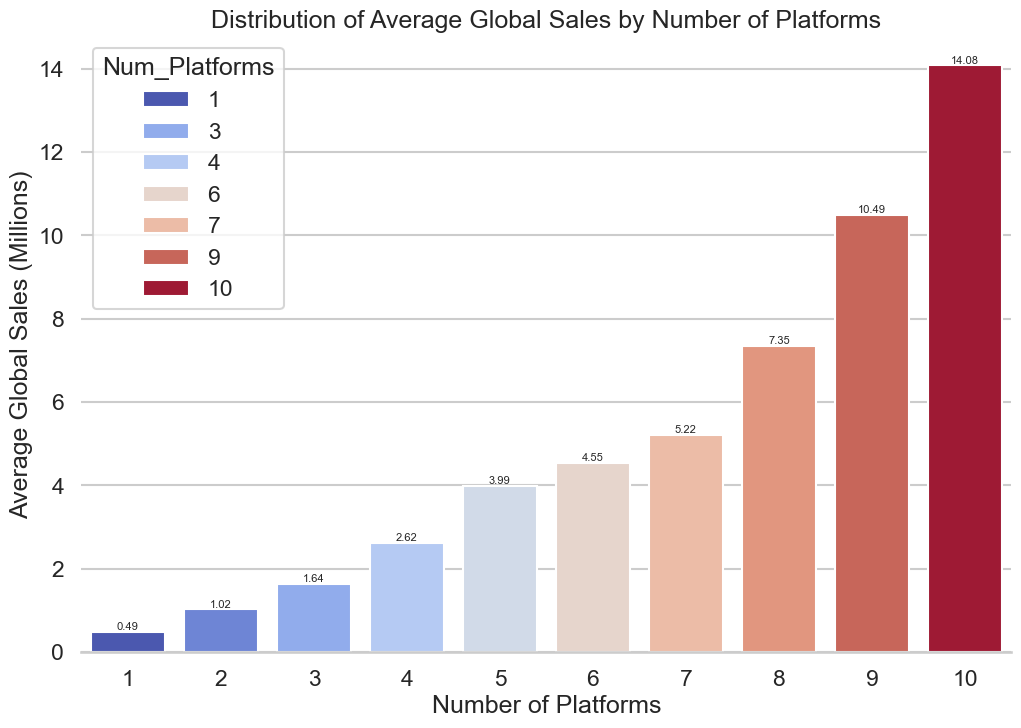

In [17]:
platform_categories = list(range(df["Num_Platforms"].min(), df["Num_Platforms"].max() + 1))
df["Num_Platforms"] = pd.Categorical(df["Num_Platforms"], categories = platform_categories, ordered = True)

sns.set_style("whitegrid")
sns.set_context("talk")

ax = plt.subplots(figsize=(12, 8))

ax = sns.barplot(data = sales_per_num_platforms,  x = "Num_Platforms", y= "Avg_Sales_Per_Game", hue = "Num_Platforms", palette= "coolwarm")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.ylabel("Average Global Sales (Millions)")
plt.xlabel("Number of Platforms")
plt.title("Distribution of Average Global Sales by Number of Platforms")
plt.show()

* **Observation:** The more platforms a game is on, the greater the average sale of games. Games on 10 platforms on average generate $14.08 million.

* **Interpretation:** Less games are published on a larger number of platforms, but those games generally reach a larger audience

* **Insight:** On a per-game basis, releasing a game on as many platforms as possible drastically increase the individual game's generated revenue

# How has Exclusive games performed in comparison to multi-platform games in each region?

In [18]:
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

In [19]:
total = 0
for region in regions:
    total_region_sales = df[region].sum()
    total = total + total_region_sales
    print(f"Total sales of {region}: ${total_region_sales} million")
print(f"total = {total}")

Total sales of NA_Sales: $4333.43 million
Total sales of EU_Sales: $2409.12 million
Total sales of JP_Sales: $1284.3 million
Total sales of Other_Sales: $789.01 million
total = 8815.86


## Has Multi-platform games achieved Higher Total Regional Sales than Exclusive games?

In [20]:
total_multi_platform_sales = 0
for region in regions:
    region_multi_sales = df[df["Exclusive"] == 0].groupby("Name")[region].sum().sum()
    print(f"Total sales for multi-platform games in {region}: ${region_multi_sales} million")
    total_multi_platform_sales = total_multi_platform_sales + region_multi_sales
print(f"Total sales for multi-platform games in: ${total_multi_platform_sales:.2f} million")

Total sales for multi-platform games in NA_Sales: $2419.82 million
Total sales for multi-platform games in EU_Sales: $1379.42 million
Total sales for multi-platform games in JP_Sales: $306.65999999999997 million
Total sales for multi-platform games in Other_Sales: $496.23 million
Total sales for multi-platform games in: $4602.13 million


In [21]:
total_single_platform_sales = 0
for region in regions:
    region_single_sales = df[df["Exclusive"] == 1][region].sum()
    print(f"Total sales for single-platform games in {region}: ${region_single_sales:.2f} million")
    total_single_platform_sales = total_single_platform_sales + region_single_sales
print(f"Total sales for single-platform games: ${total_single_platform_sales:.2f} million")

Total sales for single-platform games in NA_Sales: $1913.61 million
Total sales for single-platform games in EU_Sales: $1029.70 million
Total sales for single-platform games in JP_Sales: $977.64 million
Total sales for single-platform games in Other_Sales: $292.78 million
Total sales for single-platform games: $4213.73 million


In [22]:
print(f"Number of multi-platform games: {num_multi_platform_games}")
print(f"Number of single-platform games: {num_single_platform_games}")
print()

avg_multi = []
avg_single = []
total_multi = []
total_single = []
for region in regions:
    print(f"{region}:")
    
    total_region_sales = df[region].sum()
    print(f"Total sales in {region}: ${total_region_sales:.2f} million")
    
    region_multi_sales = df[df["Exclusive"] == 0].groupby("Name")[region].sum().sum()
    total_multi.append(region_multi_sales)
    print(f"Total sales for multi-platform games in {region}: ${region_multi_sales:.2f} million")
    
    avg_multi_sales_region = region_multi_sales/num_multi_platform_games
    avg_multi.append(avg_multi_sales_region)
    print(f"Average sales for multi-platform games in {region}: ${avg_multi_sales_region:.2f} million")

    region_single_sales = df[df["Exclusive"] == 1][region].sum()
    total_single.append(region_single_sales)
    print(f"Total sales for single-platform games in {region}: ${region_single_sales:.2f} million")
    
    avg_single_sales_region = region_single_sales/num_single_platform_games
    avg_single.append(avg_single_sales_region)
    print(f"Average sales for single-platform games in {region}: ${avg_single_sales_region:.2f} million")
    print()

Number of multi-platform games: 2717
Number of single-platform games: 8643

NA_Sales:
Total sales in NA_Sales: $4333.43 million
Total sales for multi-platform games in NA_Sales: $2419.82 million
Average sales for multi-platform games in NA_Sales: $0.89 million
Total sales for single-platform games in NA_Sales: $1913.61 million
Average sales for single-platform games in NA_Sales: $0.22 million

EU_Sales:
Total sales in EU_Sales: $2409.12 million
Total sales for multi-platform games in EU_Sales: $1379.42 million
Average sales for multi-platform games in EU_Sales: $0.51 million
Total sales for single-platform games in EU_Sales: $1029.70 million
Average sales for single-platform games in EU_Sales: $0.12 million

JP_Sales:
Total sales in JP_Sales: $1284.30 million
Total sales for multi-platform games in JP_Sales: $306.66 million
Average sales for multi-platform games in JP_Sales: $0.11 million
Total sales for single-platform games in JP_Sales: $977.64 million
Average sales for single-platfo

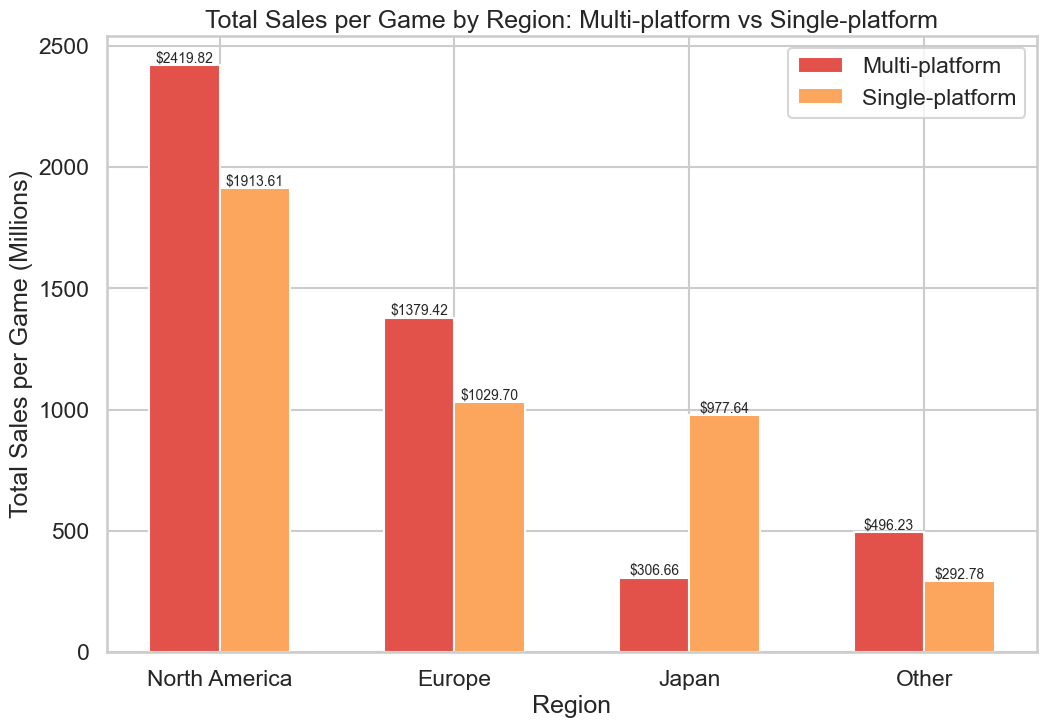

In [23]:
sns.set_style("whitegrid")
sns.set_context("talk")

graph_width = range(len(regions))
bar_width = 0.30

fig, ax = plt.subplots(figsize=(12, 8))

for i in graph_width:
    ax.bar(i - bar_width/2, total_multi[i], bar_width,  label="Multi-platform" if i == 0 else "", color=sns.color_palette("Spectral")[0])
    ax.text(i - bar_width/2, total_multi[i], f"${total_multi[i]:.2f}", ha='center', va='bottom', fontsize=10)
    ax.bar(i + bar_width/2, total_single[i], bar_width, label="Single-platform" if i == 0 else "", color=sns.color_palette("Spectral")[1])
    ax.text(i + bar_width/2, total_single[i], f"${total_single[i]:.2f}", ha='center', va='bottom', fontsize=10)

ax.set_xticks(graph_width)
ax.set_xticklabels(["North America", "Europe", "Japan", "Other"])
ax.set_ylabel("Total Sales per Game (Millions)")
ax.set_xlabel("Region")
ax.set_title("Total Sales per Game by Region: Multi-platform vs Single-platform")
ax.legend()

plt.show()

* **Observation:** Multi-platform games achieved higher sales in all regions but Japan. In japan, exclusive games generated 977.64 million, while $306.66 million were generated from multi-platform games

* **Interpretation:** Japan's audience tend to favor exclusive games possibly due to popularity of specific platforms and platform brand loyalty

* **Insight:** Multi-platform games usually garner greater sales, however regional identities/preferences should be considered when releasing games, as demonstrated by Japan

## Has Multi-platform games achieved Higher Average Regional Sales than Exclusive games?

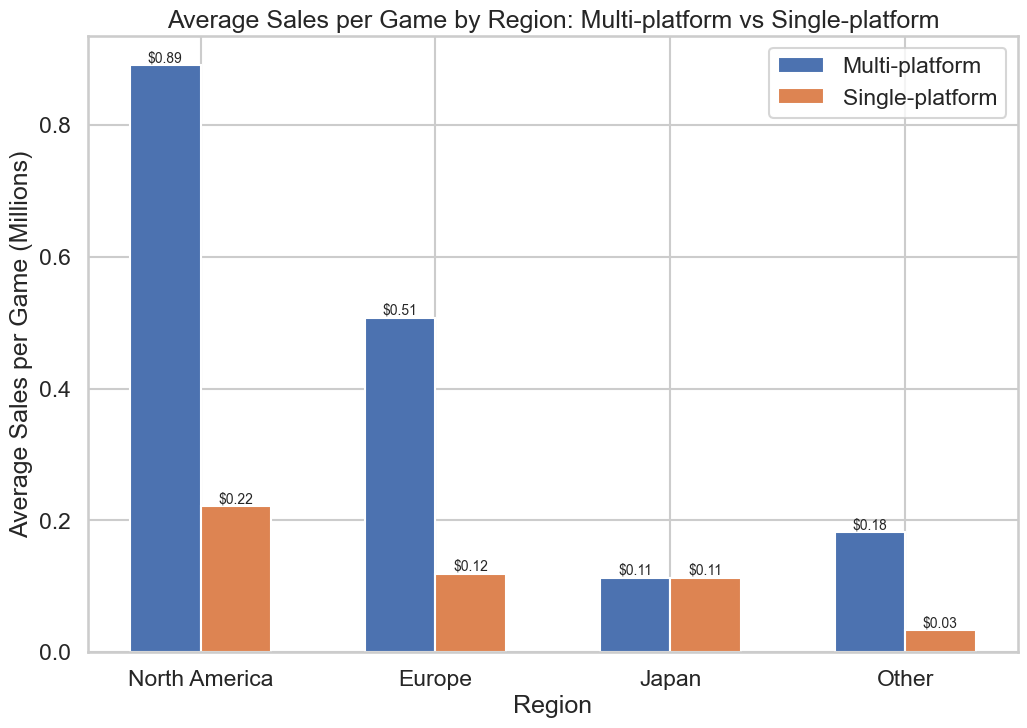

In [24]:
sns.set_style("whitegrid")
sns.set_context("talk")

graph_width = range(len(regions))
bar_width = 0.30

fig, ax = plt.subplots(figsize=(12, 8))

for i in graph_width:
    ax.bar(i - bar_width/2, avg_multi[i], bar_width,  label="Multi-platform" if i == 0 else "", color=sns.color_palette("deep")[0])
    ax.text(i - bar_width/2, avg_multi[i], f"${avg_multi[i]:.2f}", ha='center', va='bottom', fontsize=10)
    ax.bar(i + bar_width/2, avg_single[i], bar_width, label="Single-platform" if i == 0 else "", color=sns.color_palette("deep")[1])
    ax.text(i + bar_width/2, avg_single[i], f"${avg_single[i]:.2f}", ha='center', va='bottom', fontsize=10)

ax.set_xticks(graph_width)
ax.set_xticklabels(["North America", "Europe", "Japan", "Other"])
ax.set_ylabel("Average Sales per Game (Millions)")
ax.set_xlabel("Region")
ax.set_title("Average Sales per Game by Region: Multi-platform vs Single-platform")
ax.legend()

plt.show()

* **Observation:** On a per-game basis, Multi-platform garners drastically more sales in all regions but japan. There is an even ratio of sales generated by Exclusive and Multi-platform games in Japan

* **Interpretation:** Multi-platform games lends itself to accessing a wider audience. However, Japanese gaming culture continues to be very loyal to exclusive games, which help balance sales in that market

* **Insight:** Multi-platform games accumulate greater sales in general and even ratio in average sales in Japan demonstrates that releasing games on multiple platforms will still do as well in Japan

# How was exlusive games performed on different platforms?

In [25]:
name_platform_counts = df.groupby("Name")["Platform"].nunique()

In [26]:
single_platform_games = name_platform_counts[name_platform_counts == 1].index
num_single_platform_games = len(single_platform_games)
print(f"Number of exclusive games:", num_single_platform_games)

Number of exclusive games: 8643


In [27]:
single_platform_games_df = df[df["Name"].isin(single_platform_games)]
single_platform_counts = single_platform_games_df.groupby("Platform")["Name"].nunique().reset_index()
single_platform_counts.columns = ["Platform", "Num_Games"]
print(single_platform_counts)

   Platform  Num_Games
0      2600        100
1       3DS        358
2        DC         43
3        DS       1598
4        GB         78
5       GBA        583
6        GC        132
7       N64        220
8       NES         71
9     Other         45
10       PC        463
11       PS        987
12      PS2       1102
13      PS3        270
14      PS4         58
15      PSP        813
16      PSV        216
17      SAT        136
18     SNES        205
19      Wii        621
20     WiiU         45
21     X360        247
22       XB        228
23     XOne         24


## Which Platforms do Exclusive games achieve the Highest Total Global Sales?

In [28]:
single_platform_games_sales = (single_platform_games_df.groupby("Platform")["Global_Sales"].sum().reset_index())
single_platform_games_sales.columns = ["Platform", "Global_Sales"]
print(single_platform_games_sales)

   Platform  Global_Sales
0      2600         57.99
1       3DS        196.70
2        DC         13.00
3        DS        621.64
4        GB        191.71
5       GBA        225.79
6        GC         96.56
7       N64        150.99
8       NES        142.83
9     Other         19.18
10       PC        118.09
11       PS        534.32
12      PS2        448.84
13      PS3        152.70
14      PS4         29.47
15      PSP        160.24
16      PSV         26.25
17      SAT         25.78
18     SNES        129.74
19      Wii        564.22
20     WiiU         50.09
21     X360        177.67
22       XB         60.69
23     XOne         21.85


In [29]:
single_platform_games_sales = single_platform_games_sales.merge(single_platform_counts, on = "Platform")
single_platform_games_sales = single_platform_games_sales.sort_values("Global_Sales", ascending = False)
print(single_platform_games_sales)

   Platform  Global_Sales  Num_Games
3        DS        621.64       1598
19      Wii        564.22        621
11       PS        534.32        987
12      PS2        448.84       1102
5       GBA        225.79        583
1       3DS        196.70        358
4        GB        191.71         78
21     X360        177.67        247
15      PSP        160.24        813
13      PS3        152.70        270
7       N64        150.99        220
8       NES        142.83         71
18     SNES        129.74        205
10       PC        118.09        463
6        GC         96.56        132
22       XB         60.69        228
0      2600         57.99        100
20     WiiU         50.09         45
14      PS4         29.47         58
16      PSV         26.25        216
17      SAT         25.78        136
23     XOne         21.85         24
9     Other         19.18         45
2        DC         13.00         43


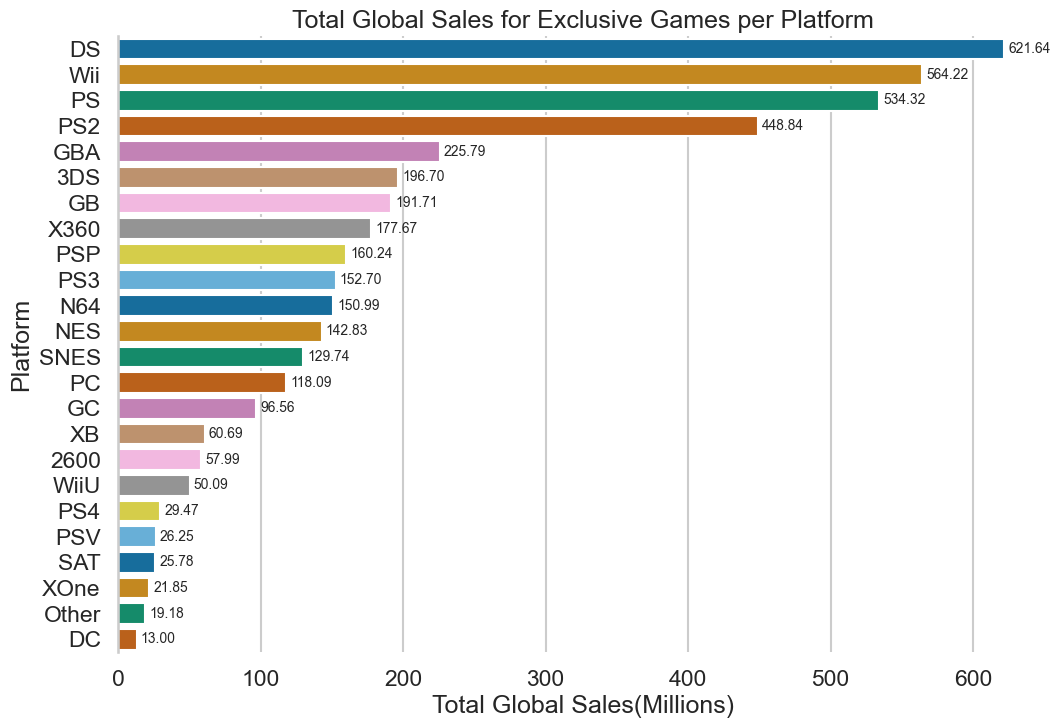

In [30]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (12, 8))
ax = sns.barplot(data = single_platform_games_sales, y = "Platform", x = "Global_Sales", hue = "Platform", palette = "colorblind")
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width:.2f}',
                    ( width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    fontsize=10, xytext = (3, 0), textcoords = 'offset points')
sns.despine(left = False, bottom = True)
plt.ylabel("Platform")
plt.xlabel("Total Global Sales(Millions)")
plt.title("Total Global Sales for Exclusive Games per Platform")
plt.show()

* **Observation:** Nintendo dominates sales for exclusive games, with DS achieving $621.64 million, Wii achieving 564.22 million, GBA achieving 225.79 million, 3DS achieving 196.70 million amd GB achieving 191.71 million. These consoles occupying 5 of the top 7 performing platforms

* **Interpretation:** The longevity and legacy of Nintendo consoles can increase the number of games sold on their platforms

* **Insight:** Players are encouraged to buy games for particular consoles by strong platform branding and exclusive game content, which improves sales performance

## Which Platforms do Exclusive games achieve the Highest Average Global Sales?

In [31]:
single_platform_games_sales["Avg_Sales"] = single_platform_games_sales["Global_Sales"] / single_platform_games_sales["Num_Games"]
single_platform_games_sales = single_platform_games_sales.sort_values("Avg_Sales", ascending = False)
print(single_platform_games_sales)

   Platform  Global_Sales  Num_Games  Avg_Sales
4        GB        191.71         78   2.457821
8       NES        142.83         71   2.011690
20     WiiU         50.09         45   1.113111
23     XOne         21.85         24   0.910417
19      Wii        564.22        621   0.908567
6        GC         96.56        132   0.731515
21     X360        177.67        247   0.719312
7       N64        150.99        220   0.686318
18     SNES        129.74        205   0.632878
0      2600         57.99        100   0.579900
13      PS3        152.70        270   0.565556
1       3DS        196.70        358   0.549441
11       PS        534.32        987   0.541358
14      PS4         29.47         58   0.508103
9     Other         19.18         45   0.426222
12      PS2        448.84       1102   0.407296
3        DS        621.64       1598   0.389011
5       GBA        225.79        583   0.387290
2        DC         13.00         43   0.302326
22       XB         60.69        228   0

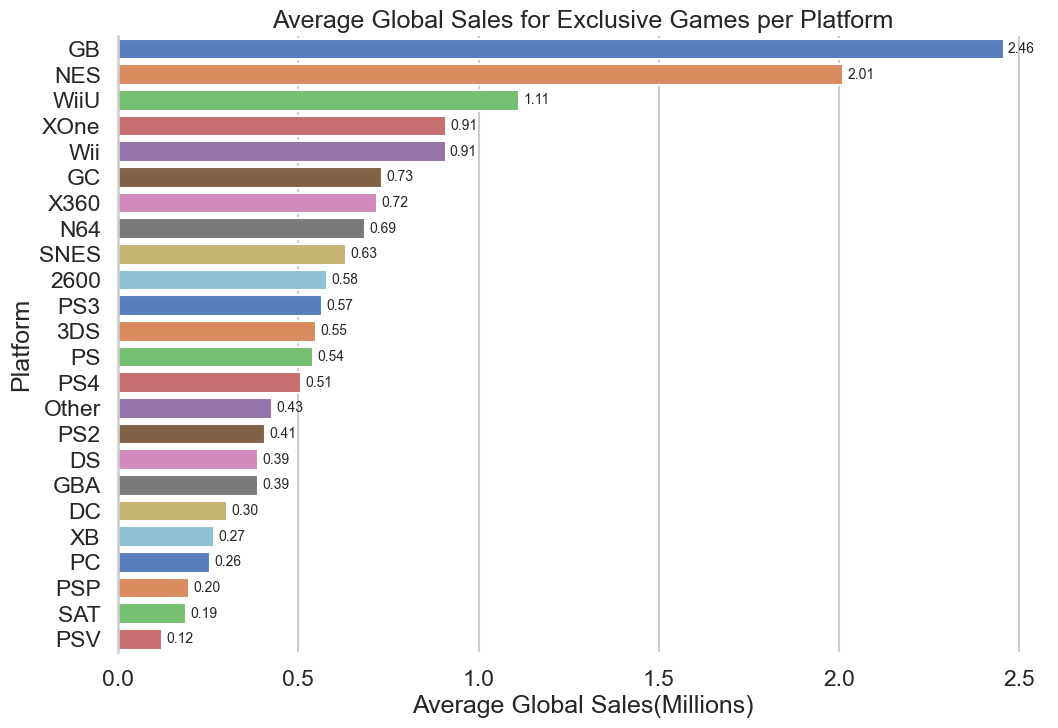

In [32]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (12, 8))
ax = sns.barplot(data = single_platform_games_sales, y = "Platform", x = "Avg_Sales", hue = "Platform", palette = "muted")
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width:.2f}',
                    ( width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    fontsize=10, xytext = (3, 0), textcoords = 'offset points')
sns.despine(left = False, bottom = True)
plt.ylabel("Platform")
plt.xlabel("Average Global Sales(Millions)")
plt.title("Average Global Sales for Exclusive Games per Platform")
plt.show()

* **Observation:** Nintendo dominates the exclusive games sales with 7 of the top 10 platforms being owned by Nintendo. GB occupied the top spot with an average of 2.46 million, followed by NES with an average of 2.01 million and then WiiU with an average of 1.11 million

* **Interpretation:** The Nintendo platforms that dominate the average sales of exclusive games introduced new and iconic franchises (such as pokemon, mario, zelda and later on splatoon for WiiU) that drove popularity and loyalty to the platforms. This resulted in individual games generating greater revenue

* **Insight:** Exclusive game content along with persuasive and powerful branding, encourages individuals to buy exclusive games titles, which drastically increase sales on a per-game basis. Recognizable and amiable IPs drives success in sales

# How has Exclusive games performed over time, in terms of Global sales, compared to Multi-platform games?

In [33]:
years = range(df["Year"].min(), df["Year"].max() + 1)
full_year_index = pd.MultiIndex.from_product([years, [0,1]], names = ["Year", "Exclusive"])

In [34]:
pd.set_option("display.max_rows", None)
sales_per_year = df.groupby(["Year", "Exclusive"])["Global_Sales"].sum().reset_index()
sales_per_year = sales_per_year.set_index(["Year", "Exclusive"]).reindex(full_year_index, fill_value=0).reset_index()
print(sales_per_year)

    Year  Exclusive  Global_Sales
0   1980          0          9.38
1   1980          1          2.00
2   1981          0          5.95
3   1981          1         29.82
4   1982          0         12.78
5   1982          1         16.08
6   1983          0          7.71
7   1983          1          9.08
8   1984          0          8.50
9   1984          1         41.86
10  1985          0         41.68
11  1985          1         12.26
12  1986          0          4.57
13  1986          1         32.50
14  1987          0          1.31
15  1987          1         20.43
16  1988          0         31.37
17  1988          1         15.85
18  1989          0         47.16
19  1989          1         26.29
20  1990          0         26.86
21  1990          1         22.53
22  1991          0         16.61
23  1991          1         15.62
24  1992          0         16.16
25  1992          1         60.00
26  1993          0          4.08
27  1993          1         41.90
28  1994      

## Has Multi-platform games achiever Higher Total Global Sales, over time, compared to Exclusive games?

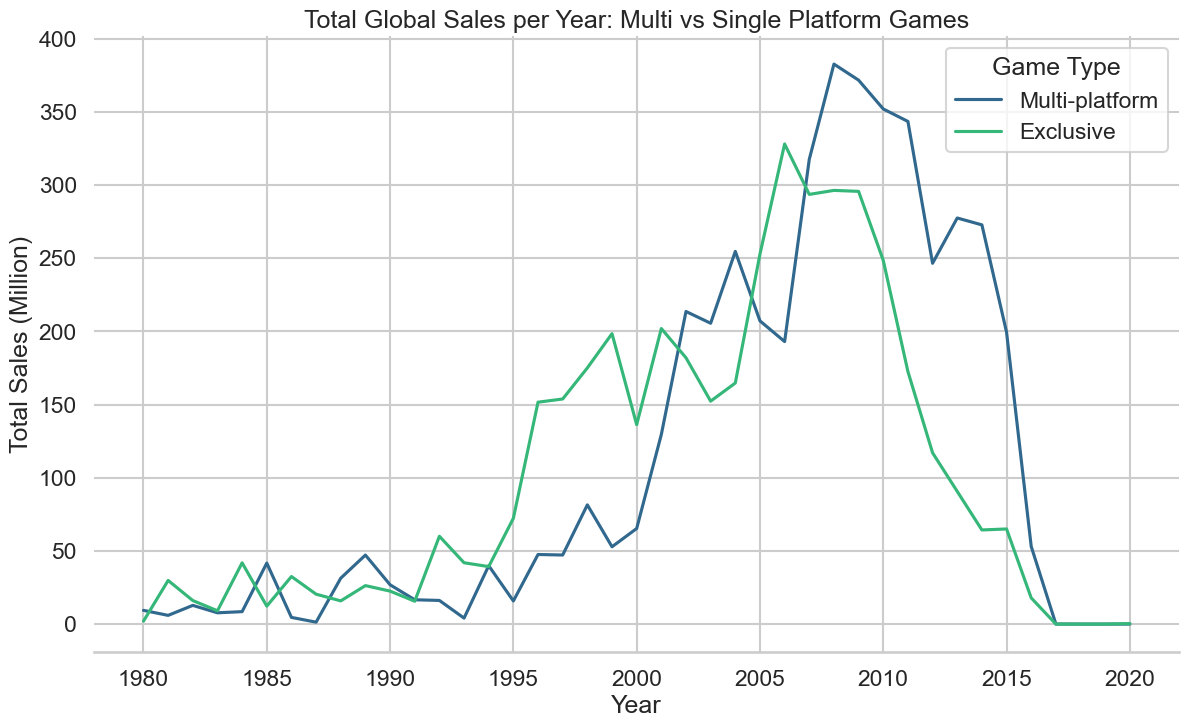

In [35]:
sales_per_year["Game_Type"] = sales_per_year["Exclusive"].map({
    0: "Multi-platform", 
    1: "Exclusive"
})

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (14, 8))
ax = sns.lineplot(data = sales_per_year, x = "Year", y = "Global_Sales", hue = "Game_Type", palette = "viridis")
sns.despine(left=True, bottom=False)
plt.ylabel("Total Sales (Million)")
plt.xlabel("Year")
plt.title("Total Global Sales per Year: Multi vs Single Platform Games")
plt.legend(title="Game Type")
plt.show()

* **Observation:** Exclusive games generally produced greater sales until the early 2000s, but multi-platformed games generally took over, with overall total sales peaking in 2008 through multi-platform games

* **Interpretation:** Pre 2000s, Nintendo released games through different mechanisms than its competitors and focused on producing their own brands/franchises which gathered a large sense of popularity and loyalty and in turn, boosted sales for their exclusive games. However throughout the 2000s marked the rise of Sony and Microsoft platforms which offered beloved games available across all platforms which shifted the dominance of sales towards multi-platformed games

* **Insight:** Multi-platform games generate greater total sales in modern day. While recognizable and unique IPs generate great success, having these titles being accessible to a broader audience can further increase total sales

## Has Multi-platform games achieved Higher Average Global sales, over time, compared to Exclusive games?? 

In [36]:
games_per_year = df.groupby(["Year", "Exclusive"])["Name"].nunique().reset_index()
games_per_year.rename(columns = {"Name": "Num_Games"}, inplace = True)

In [37]:
avg_sales_per_year = sales_per_year.merge(games_per_year, on = ["Year", "Exclusive"], how = "left")
avg_sales_per_year["Num_Games"] = avg_sales_per_year["Num_Games"].fillna(0).astype(int)
print(avg_sales_per_year)

    Year  Exclusive  Global_Sales       Game_Type  Num_Games
0   1980          0          9.38  Multi-platform          5
1   1980          1          2.00       Exclusive          4
2   1981          0          5.95  Multi-platform          4
3   1981          1         29.82       Exclusive         42
4   1982          0         12.78  Multi-platform          6
5   1982          1         16.08       Exclusive         30
6   1983          0          7.71  Multi-platform          4
7   1983          1          9.08       Exclusive         13
8   1984          0          8.50  Multi-platform          4
9   1984          1         41.86       Exclusive         10
10  1985          0         41.68  Multi-platform          3
11  1985          1         12.26       Exclusive         11
12  1986          0          4.57  Multi-platform          3
13  1986          1         32.50       Exclusive         18
14  1987          0          1.31  Multi-platform          2
15  1987          1     

In [38]:
avg_sales_per_year["Avg_Sales"] = (avg_sales_per_year["Global_Sales"]/avg_sales_per_year["Num_Games"]).round(2)
avg_sales_per_year["Avg_Sales"] = avg_sales_per_year["Avg_Sales"].fillna(0)
print(avg_sales_per_year)

    Year  Exclusive  Global_Sales       Game_Type  Num_Games  Avg_Sales
0   1980          0          9.38  Multi-platform          5       1.88
1   1980          1          2.00       Exclusive          4       0.50
2   1981          0          5.95  Multi-platform          4       1.49
3   1981          1         29.82       Exclusive         42       0.71
4   1982          0         12.78  Multi-platform          6       2.13
5   1982          1         16.08       Exclusive         30       0.54
6   1983          0          7.71  Multi-platform          4       1.93
7   1983          1          9.08       Exclusive         13       0.70
8   1984          0          8.50  Multi-platform          4       2.12
9   1984          1         41.86       Exclusive         10       4.19
10  1985          0         41.68  Multi-platform          3      13.89
11  1985          1         12.26       Exclusive         11       1.11
12  1986          0          4.57  Multi-platform          3    

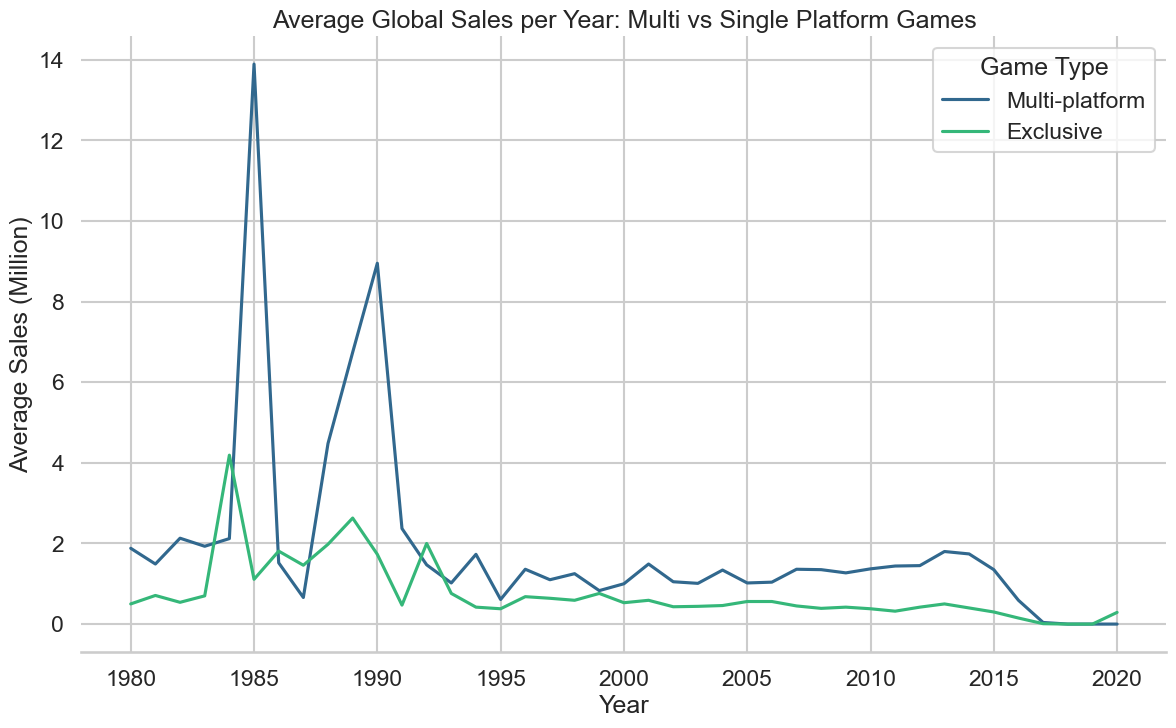

In [39]:
sales_per_year["Game_Type"] = sales_per_year["Exclusive"].map({
    0: "Multi-platform", 
    1: "Exclusive"
})

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (14, 8))
ax = sns.lineplot(data = avg_sales_per_year, x = "Year", y = "Avg_Sales", hue = "Game_Type", palette = "viridis")
sns.despine(left=True, bottom=False)
plt.ylabel("Average Sales (Million)")
plt.xlabel("Year")
plt.title("Average Global Sales per Year: Multi vs Single Platform Games")
plt.legend(title="Game Type")
plt.show()

* **Observation:** Multi-platform games consistently gained greater average sales compared to exclusive games, with the only exception coming from the period 1986 to 1987

* **Interpretation:** Multi-platform games consistently found a wider audience allowing for game sales to be greater compared to exclusive games. However in 1986, Nintendo saw the release of soon to be iconic franchises in the USA, such as Zelda and Metroid. Both of which are exclusive titles to Nintendo consoles at the time. With little competition, multi-platform games saw little sales in the grand scheme

* **Insight:** Multi-platform games generally perform better than exclusive games with little exception. However, when preparing to launch games, companies should take rival companies' release strategies into account.

# How has Exclusive games performed over time, in terms of Regional Sales, compared to Multi-platform games?

In [40]:
years = range(df["Year"].min(), df["Year"].max() + 1)
full_year_index = pd.MultiIndex.from_product([years, [0,1]], names = ["Year", "Exclusive"])

In [41]:
region_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

pd.set_option("display.max_rows", None)
regional_sales_per_year = df.groupby(["Year", "Exclusive"])[region_columns].sum().reset_index()
regional_sales_per_year = regional_sales_per_year.set_index(["Year", "Exclusive"]).reindex(full_year_index, fill_value=0).reset_index()
print(regional_sales_per_year)

    Year  Exclusive  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0   1980          0      8.73      0.55      0.00         0.11
1   1980          1      1.86      0.12      0.00         0.01
2   1981          0      5.55      0.33      0.00         0.06
3   1981          1     27.85      1.63      0.00         0.26
4   1982          0     11.91      0.73      0.00         0.15
5   1982          1     15.01      0.92      0.00         0.16
6   1983          0      1.98      0.39      5.27         0.07
7   1983          1      5.78      0.41      2.83         0.07
8   1984          0      1.97      0.47      5.97         0.08
9   1984          1     31.31      1.63      8.30         0.62
10  1985          0     29.26      3.58      8.07         0.77
11  1985          1      4.47      1.16      6.49         0.15
12  1986          0      1.40      0.22      2.92         0.04
13  1986          1     11.10      2.62     16.89         1.89
14  1987          0      0.76      0.02      0.52      

## Has Multi-platform games achiever Higher Total Regional Sales, over time, compared to Exclusive games?

In [42]:
regional_sales_per_year_long = regional_sales_per_year.melt(id_vars = ["Year", "Exclusive"], value_vars = region_columns, var_name = "Region", value_name = "Sales")
regional_sales_per_year_long["Region"] = regional_sales_per_year_long["Region"].str.replace("_Sales", "")

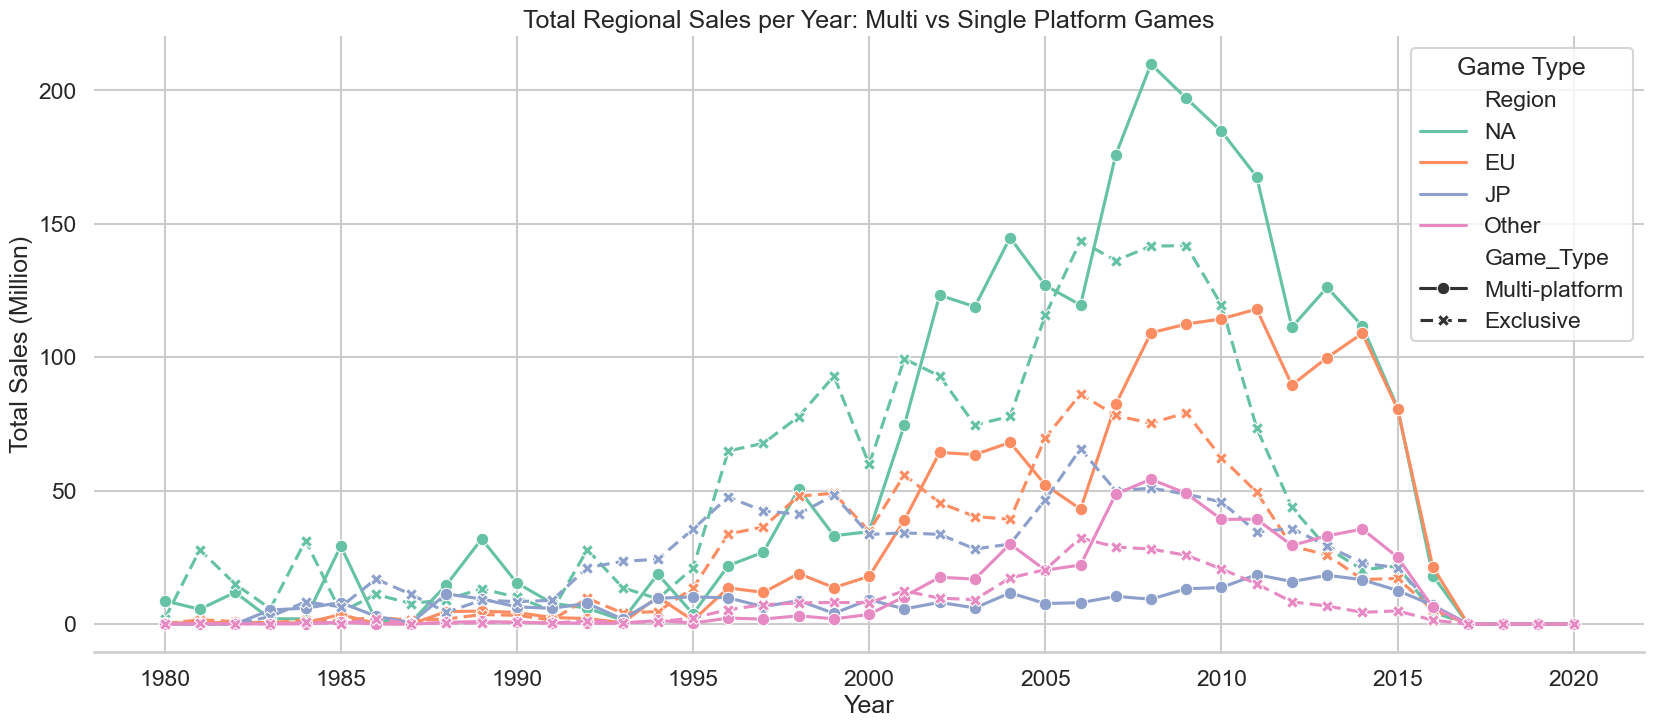

In [43]:
regional_sales_per_year_long["Game_Type"] = regional_sales_per_year_long["Exclusive"].map({
    0: "Multi-platform", 
    1: "Exclusive"
})

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = regional_sales_per_year_long, x = "Year", y = "Sales", hue = "Region", style = "Game_Type", palette = "Set2", markers = True, dashes = {"Multi-platform": "", "Exclusive": (4,2)})
sns.despine(left=True, bottom=False)
plt.ylabel("Total Sales (Million)")
plt.xlabel("Year")
plt.title("Total Regional Sales per Year: Multi vs Single Platform Games")
plt.legend(title="Game Type")
plt.show()

* **Observation:** NA consistently accumulated the highest total sales of any region, peaking at over 200 million in 2008. Exclusive games attained higher total sales in all regions for a period of time until early 2000s (2001-2002), where multi-platform games garnered higher total sales. However, throughout Japan's entire gaming history, exclusive games performed better in total sales compared to multi-platform games. Also in 2006, there was a rise in exclusive game sales throughout every region that surpassed the total sales in that year for multi-platform games.

* **Interpretation:** A rise in gaming popularity at specific times and introduction of online gaming saw games on multiple platforms gaining greater total sales. But Japan's population loyalty to their games and brands remained strong to keep the market more devoted towards exclusive games.

* **Insight:** While multi-platform games generally garner greater total sales, establishing strong IPs to appeal to Japanese audiences is difficult to obtain and companies should consider what makes exclusive games popular in Japan in order to boost sales for multiplatform games in that region.

## Has Multi-platform games achiever Higher Average Regional Sales, over time, compared to Exclusive games?

In [44]:
games_per_year = df.groupby(["Year", "Exclusive"])["Name"].nunique().reset_index()
games_per_year.rename(columns = {"Name": "Num_Games"}, inplace = True)

In [45]:
avg_regional_sales_per_year = regional_sales_per_year.merge(games_per_year, on = ["Year", "Exclusive"], how = "left")
avg_regional_sales_per_year["Num_Games"] = avg_regional_sales_per_year["Num_Games"].fillna(0).astype(int)
print(avg_regional_sales_per_year)

    Year  Exclusive  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Num_Games
0   1980          0      8.73      0.55      0.00         0.11          5
1   1980          1      1.86      0.12      0.00         0.01          4
2   1981          0      5.55      0.33      0.00         0.06          4
3   1981          1     27.85      1.63      0.00         0.26         42
4   1982          0     11.91      0.73      0.00         0.15          6
5   1982          1     15.01      0.92      0.00         0.16         30
6   1983          0      1.98      0.39      5.27         0.07          4
7   1983          1      5.78      0.41      2.83         0.07         13
8   1984          0      1.97      0.47      5.97         0.08          4
9   1984          1     31.31      1.63      8.30         0.62         10
10  1985          0     29.26      3.58      8.07         0.77          3
11  1985          1      4.47      1.16      6.49         0.15         11
12  1986          0      1.40      0.2

In [46]:
for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]:
    avg_regional_sales_per_year[f"Avg_{region}"] = (avg_regional_sales_per_year[region]/avg_regional_sales_per_year["Num_Games"]).round(2)
    avg_regional_sales_per_year[f"Avg_{region}"] = avg_regional_sales_per_year[f"Avg_{region}"].fillna(0)
print(avg_regional_sales_per_year)

    Year  Exclusive  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Num_Games  \
0   1980          0      8.73      0.55      0.00         0.11          5   
1   1980          1      1.86      0.12      0.00         0.01          4   
2   1981          0      5.55      0.33      0.00         0.06          4   
3   1981          1     27.85      1.63      0.00         0.26         42   
4   1982          0     11.91      0.73      0.00         0.15          6   
5   1982          1     15.01      0.92      0.00         0.16         30   
6   1983          0      1.98      0.39      5.27         0.07          4   
7   1983          1      5.78      0.41      2.83         0.07         13   
8   1984          0      1.97      0.47      5.97         0.08          4   
9   1984          1     31.31      1.63      8.30         0.62         10   
10  1985          0     29.26      3.58      8.07         0.77          3   
11  1985          1      4.47      1.16      6.49         0.15         11   

In [47]:
avg_region_columns = ["Avg_NA_Sales", "Avg_EU_Sales", "Avg_JP_Sales", "Avg_Other_Sales"]

avg_regional_sales_per_year_long = avg_regional_sales_per_year.melt(id_vars = ["Year", "Exclusive", "Num_Games"], value_vars = avg_region_columns, var_name = "Region", value_name = "Avg_Sales")
avg_regional_sales_per_year_long["Region"] = avg_regional_sales_per_year_long["Region"].str.replace("Avg_", "").str.replace("_Sales", "")

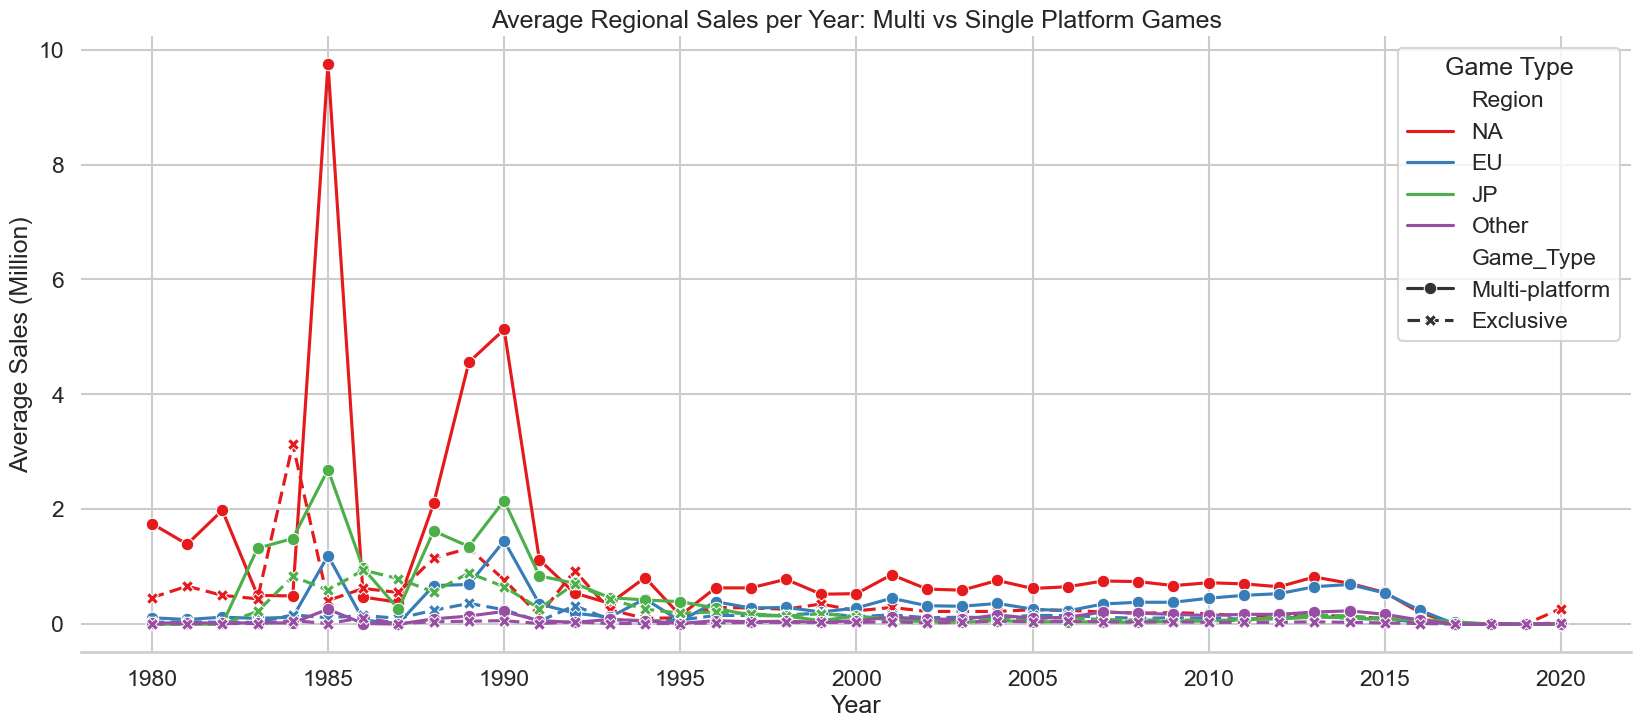

In [48]:
avg_regional_sales_per_year_long["Game_Type"] = regional_sales_per_year_long["Exclusive"].map({
    0: "Multi-platform", 
    1: "Exclusive"
})

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (20, 8))
ax = sns.lineplot(data = avg_regional_sales_per_year_long, x = "Year", y = "Avg_Sales", hue = "Region", style = "Game_Type", palette = "Set1", markers = True, dashes = {"Multi-platform": "", "Exclusive": (4,2)})
sns.despine(left=True, bottom=False)
plt.ylabel("Average Sales (Million)")
plt.xlabel("Year")
plt.title("Average Regional Sales per Year: Multi vs Single Platform Games")
plt.legend(title="Game Type")
plt.show()

* **Observation:** Before 1995 saw the highest average sales in all regions with peak average sales coming from multi-platform games in all regions. Particularly in NA during 1985 where there were approximately 10 million average sales. From 1985 onwards, the number of average sales remained generally consistent across all regions at around 0 to 1 million in average sales, but multi-platform gaming still performed slightly better than exclusive games across all regions.

* **Interpretation:** Mult-platform games are able to reach a wider audience which brings about greater average sales on games. Japan's patterns show that even though exclusives account for the majority of total volume, their average sales per title are diluted because of the large number of exclusives produced.

* **Insight:** Multi-platform games yield higher profits on a per-game basis. Multi-platform strategies should be given top priority by businesses looking to increase sales, particularly outside of Japan. Due to the high volume of exclusives in Japan, companies must carefully balance their release strategies. While utilizing multi-platform releases can still guarantee a wider reach, concentrating on a small number of high-quality exclusives may be more effective than mass distribution.

# How has game Genres performed in terms of Sales; both Globally and Regionally?

In [49]:
distinct_games_per_genre = df.groupby("Genre")["Name"].nunique().reset_index()
distinct_games_per_genre.columns = ["Genre", "Num_Distinct_Games"]

distinct_games_per_genre = distinct_games_per_genre.sort_values("Num_Distinct_Games", ascending=False)
print(distinct_games_per_genre)

           Genre  Num_Distinct_Games
0         Action                1900
10        Sports                1366
3           Misc                1315
7   Role-Playing                1206
1      Adventure                1040
8        Shooter                 806
6         Racing                 761
9     Simulation                 714
2       Fighting                 605
4       Platform                 580
11      Strategy                 579
5         Puzzle                 492


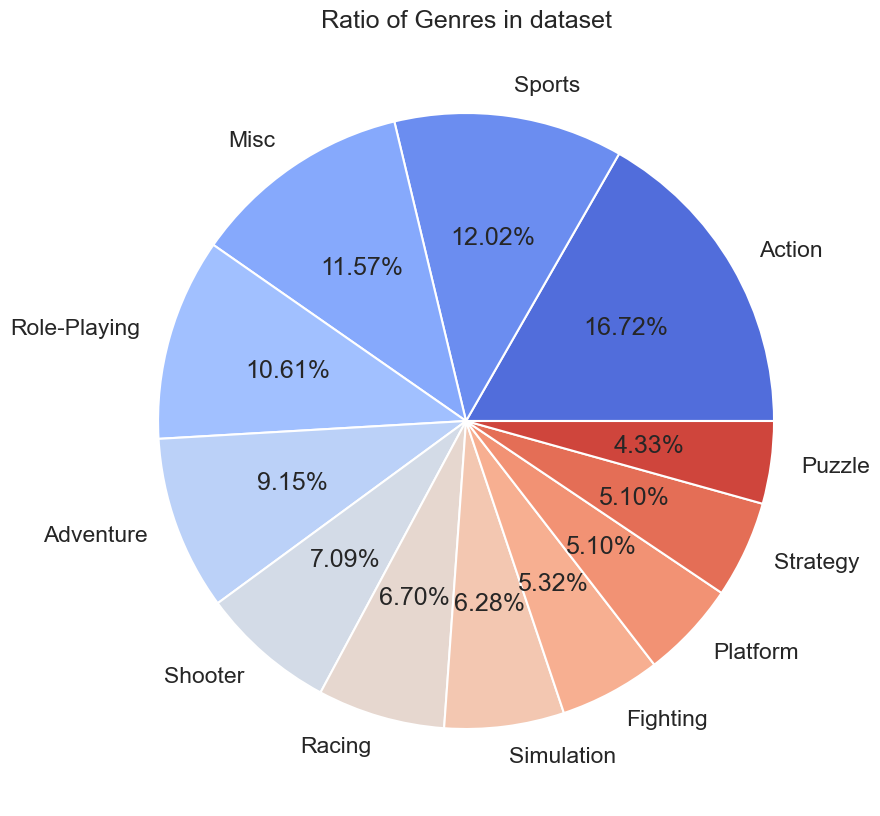

In [50]:
genre_counts = distinct_games_per_genre["Num_Distinct_Games"]

plt.figure(figsize=(10,10))
plt.pie(genre_counts, labels=distinct_games_per_genre["Genre"], autopct="%1.2f%%", colors=sns.color_palette("coolwarm", len(genre_counts)))
plt.title("Ratio of Genres in dataset")
plt.show()

## Which Genres of games achieved the Highest Total Global sales?

In [51]:
game_sales = df.groupby(["Name", "Genre"], as_index=False)["Global_Sales"].sum()

sales_per_genre_distinct = game_sales.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_per_genre_distinct = sales_per_genre_distinct.sort_values("Global_Sales", ascending = False)
print(sales_per_genre_distinct)

           Genre  Global_Sales
0         Action       1722.84
10        Sports       1309.24
8        Shooter       1026.16
7   Role-Playing        923.84
4       Platform        829.15
3           Misc        797.60
6         Racing        726.79
2       Fighting        444.07
9     Simulation        390.16
5         Puzzle        242.22
1      Adventure        234.80
11      Strategy        173.45


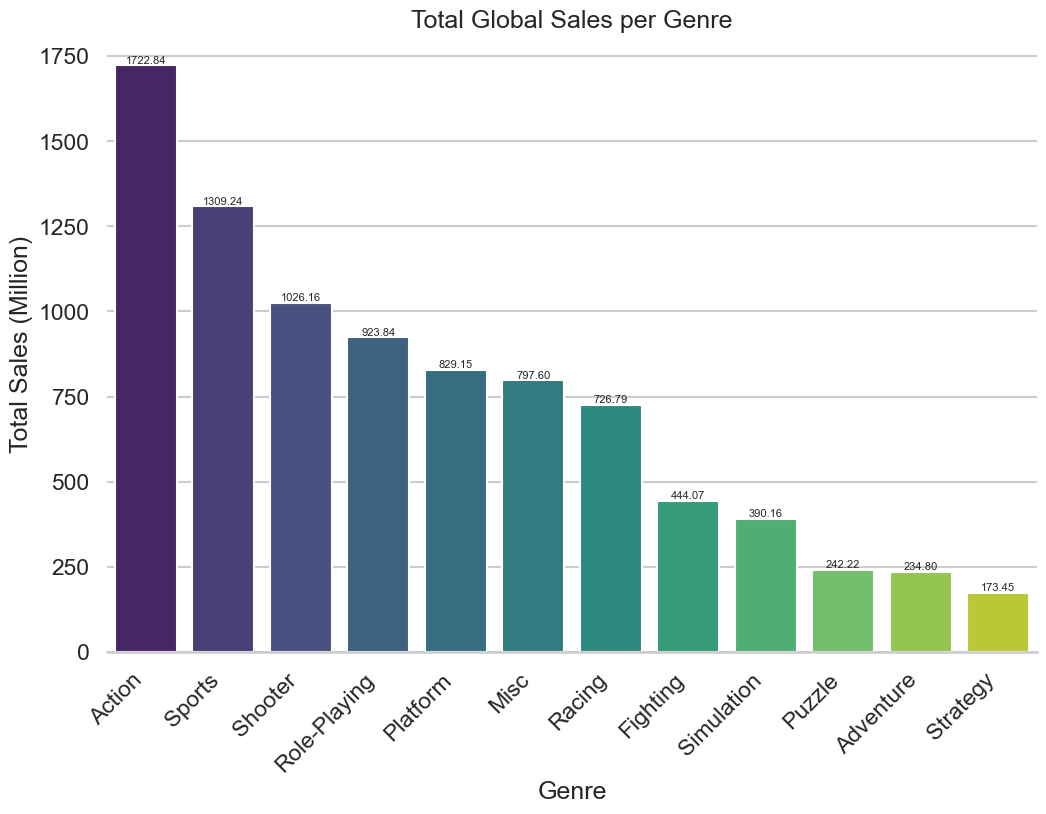

In [52]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (12, 8))
ax = sns.barplot(data = sales_per_genre_distinct, x = "Genre", y = "Global_Sales", hue = "Genre", palette = "viridis")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.ylabel("Total Sales (Million)")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.title("Total Global Sales per Genre")
plt.show()

* **Observation:** Action games generate the most total global sales, followed by sports. Shooters then generate the third highest global sales. Role-playing, platform, Misc, and Racing then follow generating great total global sales, but roughly garnering close sums.
  
* **Interpretation:** Due to their wider appeal, accessible gameplay, and frequent advantages from well-known franchises (such as FIFA, Call of Duty, and Grand Theft Auto), action, sports, and shooter games are the most popular. In contrast, niche genres like strategy, simulation and puzzle games target smaller, more specialized audiences, which restricts their overall sales potential even though those audiences are very loyal.
  
* **Insight:** While concentrating on Action, Sports and Shooter games can help companies increase revenue, differentiation is essential to the intense competition in these genres. Despite having lower overall sales, niche genres can offer businesses special chances to reach underrepresented markets or develop powerful IPs with less competition. A well-balanced portfolio can lower risk and increase market reach by strategically investing in niche genres while dominating popular ones.

## Which Genres of games achieved the Highest Average Global Sales?

In [53]:
avg_sales_per_genre = sales_per_genre_distinct.merge(distinct_games_per_genre, on = "Genre")

avg_sales_per_genre["Avg_Sales"] = (avg_sales_per_genre["Global_Sales"] / avg_sales_per_genre["Num_Distinct_Games"])
avg_sales_per_genre = avg_sales_per_genre.sort_values("Avg_Sales", ascending = False)
print(avg_sales_per_genre)

           Genre  Global_Sales  Num_Distinct_Games  Avg_Sales
4       Platform        829.15                 580   1.429569
2        Shooter       1026.16                 806   1.273151
1         Sports       1309.24                1366   0.958448
6         Racing        726.79                 761   0.955046
0         Action       1722.84                1900   0.906758
3   Role-Playing        923.84                1206   0.766036
7       Fighting        444.07                 605   0.734000
5           Misc        797.60                1315   0.606540
8     Simulation        390.16                 714   0.546443
9         Puzzle        242.22                 492   0.492317
11      Strategy        173.45                 579   0.299568
10     Adventure        234.80                1040   0.225769


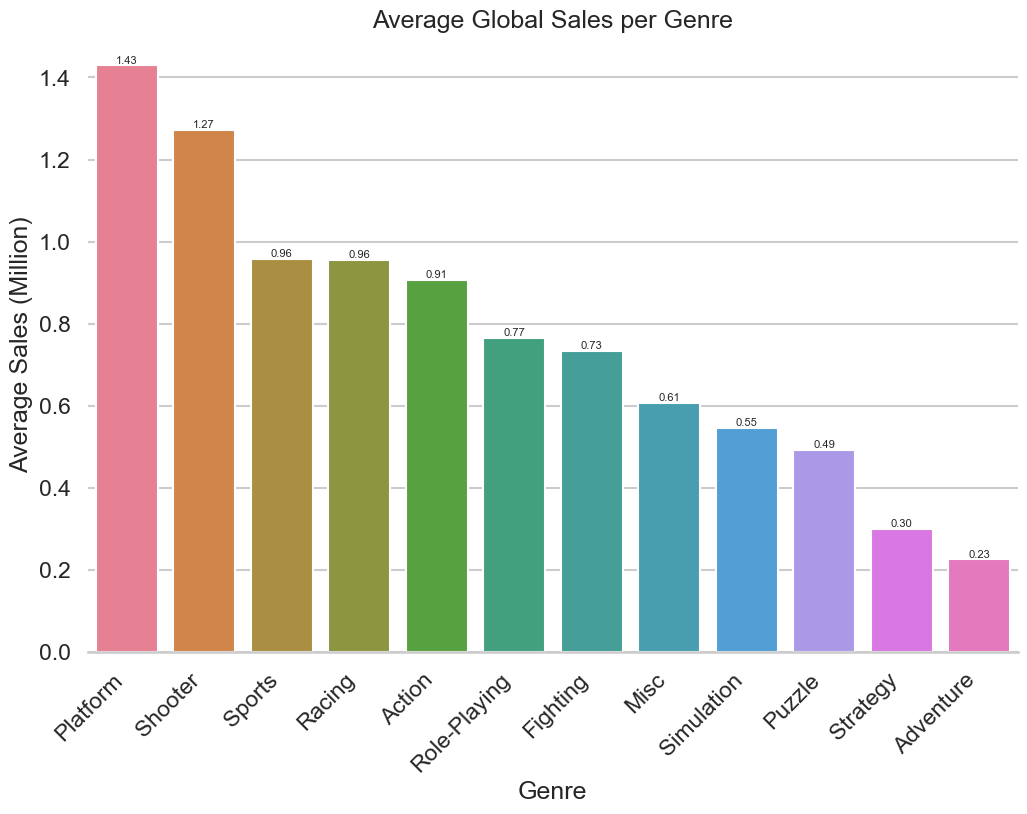

In [54]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (12, 8))
ax = sns.barplot(data = avg_sales_per_genre, x = "Genre", y = "Avg_Sales", hue = "Genre", palette = "husl")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)
sns.despine(left=True, bottom=False)
plt.ylabel("Average Sales (Million)")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.title("Average Global Sales per Genre")
plt.show()

* **Observation:** On a per-game basis, Platformers and Shooters dominate the average sales of games, with both crossing over 1 million average sales. This is followed by sports and racing games with similar average sales of 0.96 million. Closely behind is Action games at 0.91 million.

* **Interpretation:** Platform games became iconic due to its accessible and easily adaptable gameplay. With iconic franchises such as Mario, MegaMan, Sonic, Banjo-Kazooie, to name a few, garnering massive success in their individual games. This causes a drive in average sales for platform games. Shooter, sports and racing games follow a similar trend with iconic franchises doing well in average sales per game, with games such as Call of Duty, FIFA and MarioKart respectively.

* **Insight:** New entrants may find it difficult to directly compete with established franchises that already define the top-performing genres. In order to increase average sales, businesses should either:
    * Make significant investments in developing unique IPs that can compete with well-known franchises
    * Investigate underrepresented genres where there is less competition and establish themselves as market leaders in that niche. This dual approach strikes a balance between the difficulty of competing on crowded genres and the chance to achieve long-term success in underutilized areas.

## Which Genres of games achieved the Highest Total sales in each Region?

In [55]:
region_game_sales = df.groupby(["Name", "Genre"], as_index=False)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

region_sales_per_genre_distinct = region_game_sales.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
print(region_sales_per_genre_distinct)

           Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action    861.80    516.48    158.66       184.92
1      Adventure    102.06     63.79     52.01        16.70
2       Fighting    220.74    100.00     87.15        36.19
3           Misc    402.48    213.82    106.67        74.02
4       Platform    445.99    200.67    130.65        51.51
5         Puzzle    122.01     50.53     56.68        12.47
6         Racing    356.93    236.32     56.61        76.68
7   Role-Playing    326.50    187.58    350.29        59.38
8        Shooter    575.16    310.45     38.18       101.90
9     Simulation    181.78    113.20     63.54        31.36
10        Sports    670.09    371.34    134.76       132.65
11      Strategy     67.89     44.94     49.10        11.23


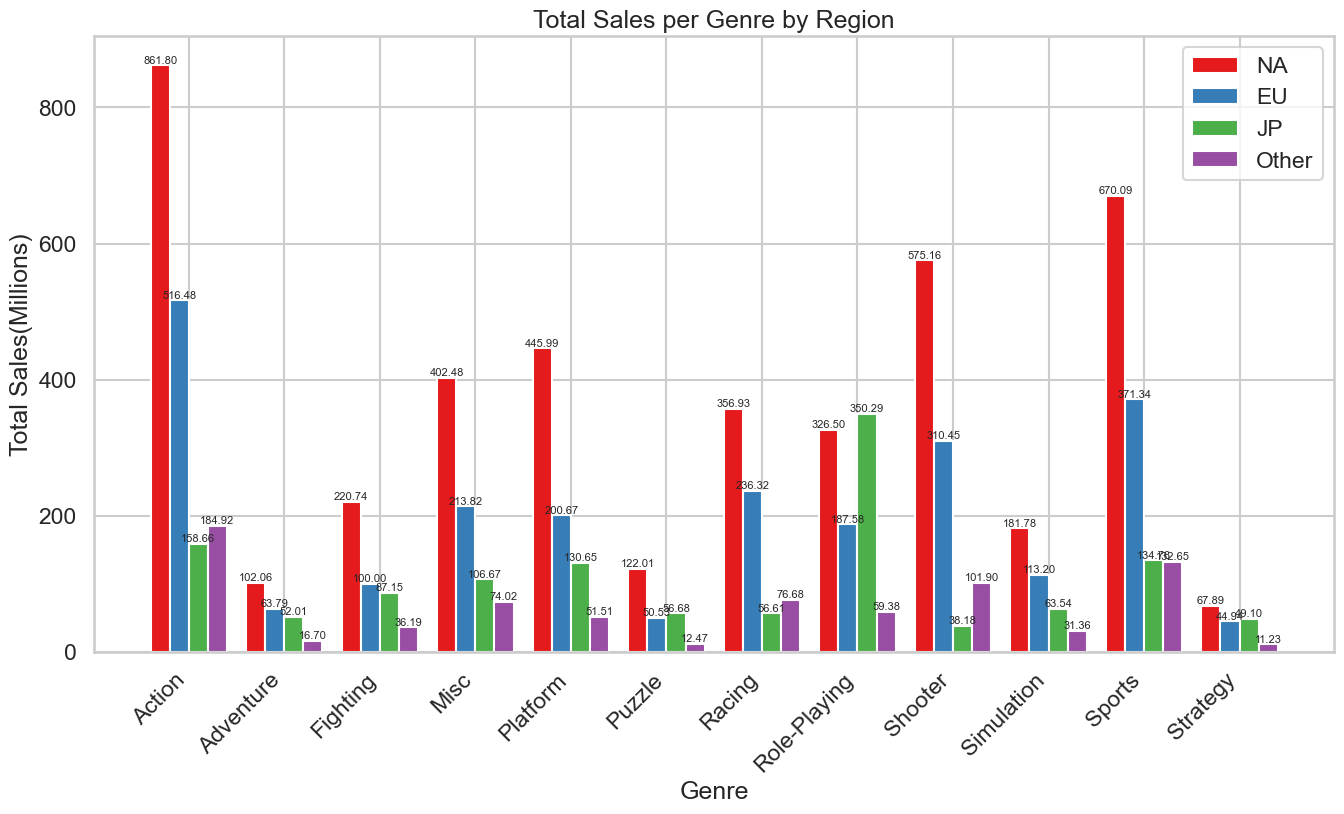

In [56]:
sns.set_style("whitegrid")
sns.set_context("talk")

genres = region_sales_per_genre_distinct["Genre"]
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
graph_width = range(len(region_sales_per_genre_distinct))
bar_width = 0.20 

fig, ax = plt.subplots(figsize=(16, 8))
colors = sns.color_palette("Set1", len(regions))

for i in graph_width:
    for j, region in enumerate(regions):
        offset = (j - (len(regions) - 1)/2) * bar_width
        value = region_sales_per_genre_distinct.loc[i, region]
        ax.bar(i + offset, value, bar_width, color = colors[j], label = region.replace("_Sales","") if i == 0 else "")
        ax.text(i + offset, value, f"{value:.2f}", ha = 'center', va = 'bottom', fontsize = 8)
        
# Labels and title
ax.set_xticks(graph_width)
ax.set_xticklabels(genres, rotation = 45, ha = 'right')
ax.set_ylabel("Total Sales(Millions)")
ax.set_xlabel("Genre")
ax.set_title("Total Sales per Genre by Region")
ax.legend()

plt.show()

* **Observation:** All Genres garnered the highest total sales in NA, but Role-playing, which obtained the highest total sales in Japan, where NA gained the second highest total sales. Japan's least popular genre was Shooter games, while EU's most popular genre was action which garnered 516.48 million, and EU's least popular genre was Strategy which garnered 44.94 million in total sales.

* **Interpretation** Majority of NA sales come from Action, Sports and Shooter games. EU gamers prefer Action, Sports and Shooter games similar to NA, indicating they enjoy franchises like Call of Duty, FIFA, and Grand Theft Auto. Japan adores Role-Playing games significantly more than any genre with popular games like Dragon Quest, Final Fantasy and Pokemon being standout franchises. This could be to these game art and graphics appealing more to them and their culture. Action and Sports games are still able to thrive in other regions with games like Grand Theft Auto, Red Dead Redemption and FIFA.

* **Insight:** When arranging distribution and marketing, businesses should match genre strategies with local preferences. For instance, Action, Sports and Shooter games are more popular in NA and EU, while Role-playing games are probably going to do best in Japan. Instead of using a one-size-fits-all global strategy, a region-specific approach enables businesses to optimize returns by focusing on genres with demonstrated cultural resonance.

## Which Genres of games achieved the Highest Average Sales in each Region?

In [57]:
region_avg_sales_per_genre = region_sales_per_genre_distinct.merge(distinct_games_per_genre, on = "Genre")

for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]:
    region_avg_sales_per_genre[f"Avg_{region}"] = region_avg_sales_per_genre[region] / region_avg_sales_per_genre["Num_Distinct_Games"]

print(region_avg_sales_per_genre)

           Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         Action    861.80    516.48    158.66       184.92   
1      Adventure    102.06     63.79     52.01        16.70   
2       Fighting    220.74    100.00     87.15        36.19   
3           Misc    402.48    213.82    106.67        74.02   
4       Platform    445.99    200.67    130.65        51.51   
5         Puzzle    122.01     50.53     56.68        12.47   
6         Racing    356.93    236.32     56.61        76.68   
7   Role-Playing    326.50    187.58    350.29        59.38   
8        Shooter    575.16    310.45     38.18       101.90   
9     Simulation    181.78    113.20     63.54        31.36   
10        Sports    670.09    371.34    134.76       132.65   
11      Strategy     67.89     44.94     49.10        11.23   

    Num_Distinct_Games  Avg_NA_Sales  Avg_EU_Sales  Avg_JP_Sales  \
0                 1900      0.453579      0.271832      0.083505   
1                 1040      0.098135      0.

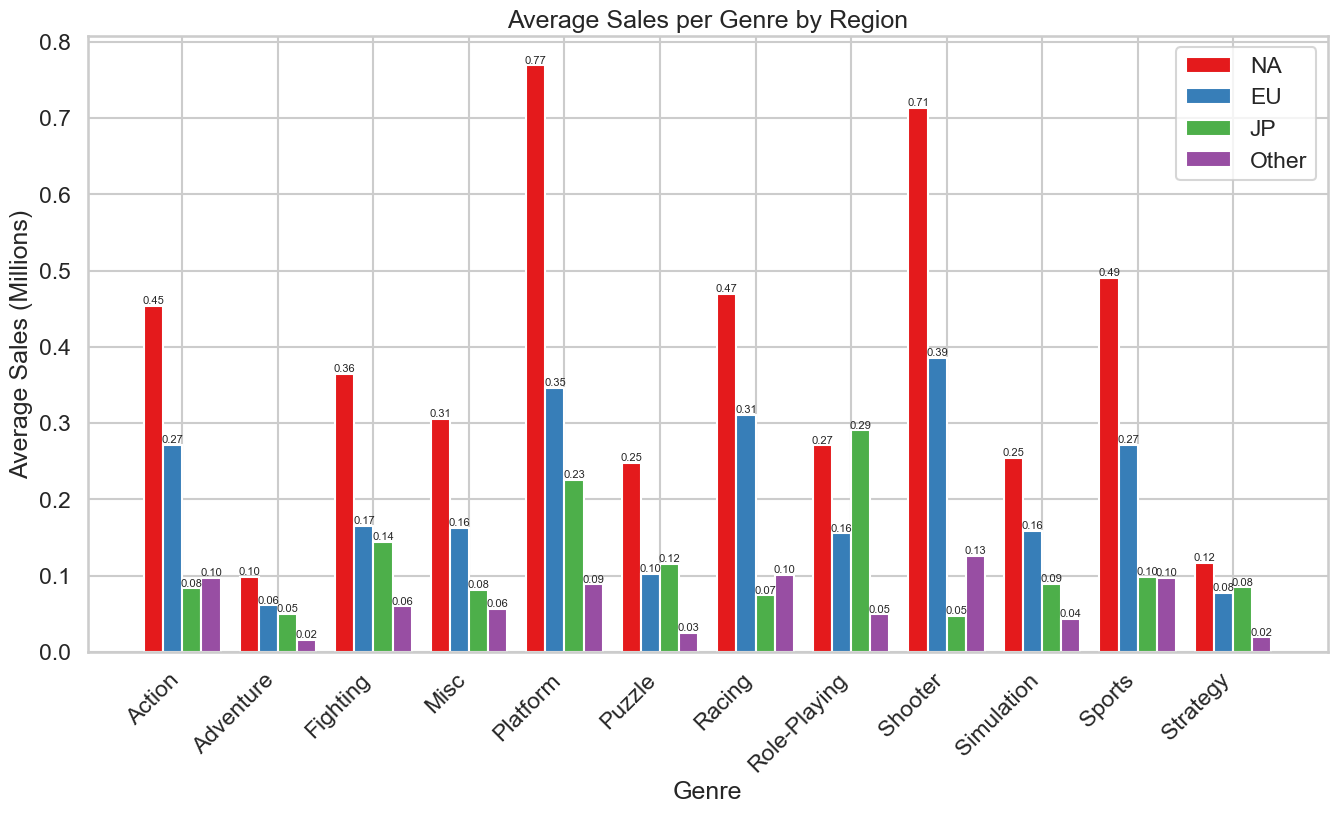

In [58]:
genres = region_avg_sales_per_genre["Genre"]
regions = ["Avg_NA_Sales", "Avg_EU_Sales", "Avg_JP_Sales", "Avg_Other_Sales"]
graph_width = range(len(region_avg_sales_per_genre))
bar_width = 0.20 

fig, ax = plt.subplots(figsize=(16, 8))
colors = sns.color_palette("Set1", len(regions))

for i in graph_width:
    for j, region in enumerate(regions):
        offset = (j - (len(regions) - 1)/2) * bar_width
        value = region_avg_sales_per_genre.loc[i, region]
        ax.bar(i + offset, value, bar_width, color = colors[j], label = region.replace("Avg_", "").replace("_Sales","") if i == 0 else "")
        ax.text(i + offset, value, f"{value:.2f}", ha = 'center', va = 'bottom', fontsize = 8)
        
# Labels and title
ax.set_xticks(graph_width)
ax.set_xticklabels(genres, rotation = 45, ha = 'right')
ax.set_ylabel("Average Sales (Millions)")
ax.set_xlabel("Genre")
ax.set_title("Average Sales per Genre by Region")
ax.legend()

plt.show()

* **Observation:** NA dominates the average sales of all genres, but Role-playing, where Japan marginally garners higher average sales by 0.2 million over NA(0.29 million in Japan and 0.27 million in NA). NA averages 0.77 million and 0.71 million sales in Platform and Shooter games respectively. EU garners average sales in Shooter, Platform and Racing with 0.39 million, 0.35 million and 0.31 million average sales respectively. Sports and Action games also achieve identical average sales in the EU of 0.27 million. Japan also achieves 0.23 million in average sales in Platform games and along with Role-playing, are the only 2 genres to achieve over 0.2 million in average sales in Japan. Shooter games are most popular in average sales across other regions gaining 0.13 million.

* **Interpretation:** NA is the largest gaming market, particularly for Platform and Shooter games, as evidenced by its dominance in average sales. While Japan's strong preference for Role-playing games demonstrates cultural loyalty to story-driven and character-based franchises, EU exhibits more balanced preferences across a variety of genres. Shooter games are the most consistently popular genre across smaller regions.

* **Insight:** Since Platform and Shooter games do best in NA, businesses should concentrate on these genres to increase average sales. A varied approach that includes Action, Sports, Racing, Platform, and Shooter games is ideal in the EU because it reflects the tastes of a wider range of players. Role-playing and Platform games are popular in Japan, underscoring the value of franchises with a strong narrative and cultural resonance. Shooter games continue to be the most consistently appealing genre for smaller regions. All things considered, regionally specific genre strategies can improve per-game performance and increase global revenue.

# Did different game Genres have an affect on the Total sales of games over Time?

In [59]:
Years = range(df["Year"].min(), df["Year"].max() + 1)
Genres = df["Genre"].unique()

full_year_genre_index = pd.MultiIndex.from_product([Years, Genres], names = ["Year", "Genre"])

## Which Genres of games have achieved the Greater Global Sales over time, and how has Genre popularity changed over Time?

In [60]:
sales_per_genre_over_time = df.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
sales_per_genre_over_time = (sales_per_genre_over_time.set_index(["Year", "Genre"]).reindex(full_year_genre_index, fill_value = 0).reset_index())
print(sales_per_genre_over_time)

     Year         Genre  Global_Sales
0    1980       Shooter          7.07
1    1980          Misc          2.71
2    1980      Fighting          0.77
3    1980        Sports          0.49
4    1980        Action          0.34
5    1980      Platform          0.00
6    1980        Puzzle          0.00
7    1980        Racing          0.00
8    1980    Simulation          0.00
9    1980     Adventure          0.00
10   1980  Role-Playing          0.00
11   1980      Strategy          0.00
12   1981       Shooter         10.04
13   1981          Misc          0.00
14   1981      Fighting          0.00
15   1981        Sports          0.79
16   1981        Action         14.84
17   1981      Platform          6.93
18   1981        Puzzle          2.24
19   1981        Racing          0.48
20   1981    Simulation          0.45
21   1981     Adventure          0.00
22   1981  Role-Playing          0.00
23   1981      Strategy          0.00
24   1982       Shooter          3.79
25   1982   

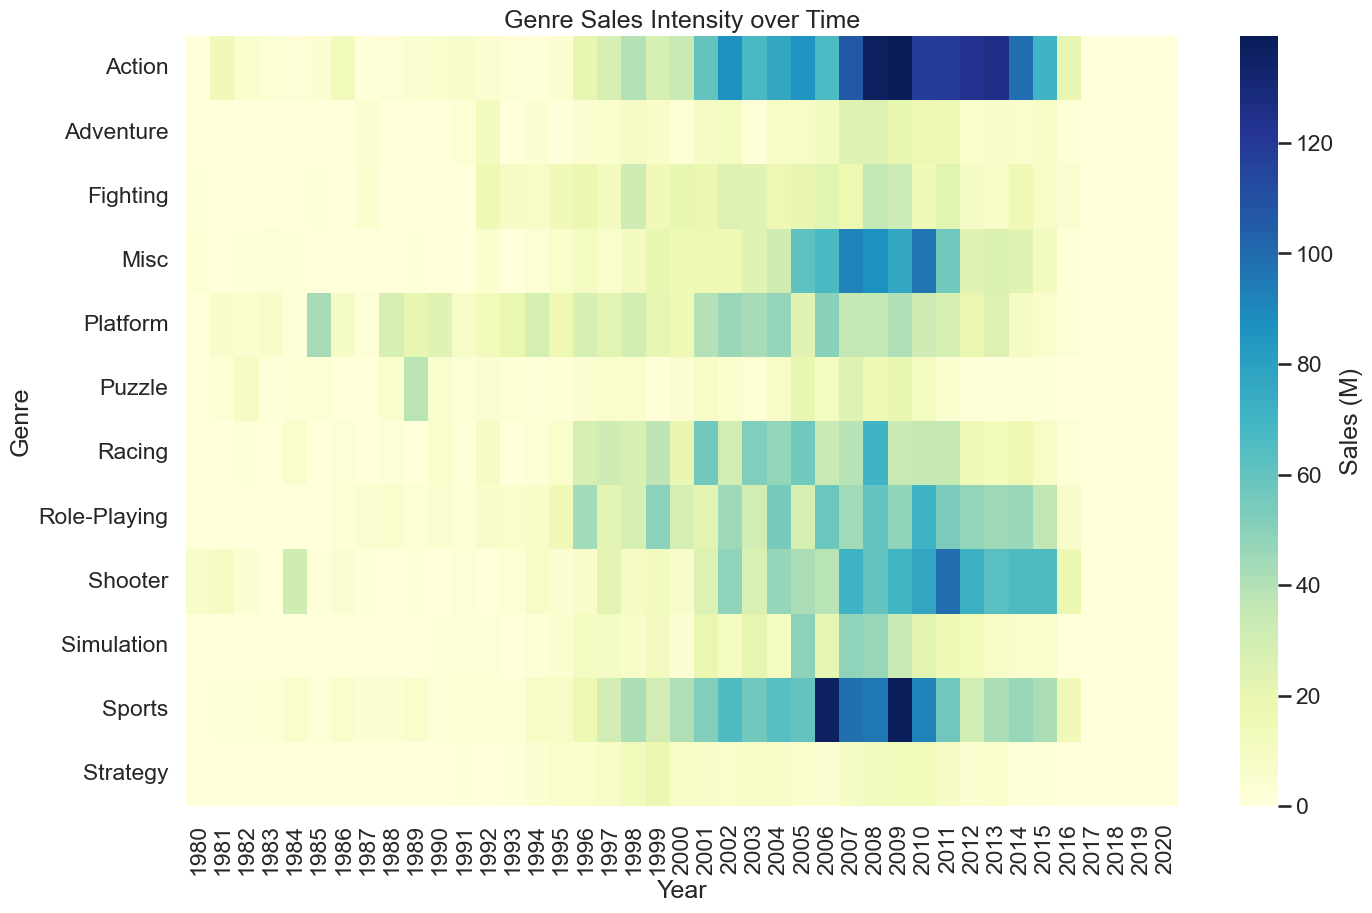

In [61]:
pivot = sales_per_genre_over_time.pivot_table(index = "Genre", columns = "Year", values = "Global_Sales", aggfunc = "sum", fill_value = 0)

plt.figure(figsize = (16, 10))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws = {'label': 'Sales (M)'})
plt.ylabel("Genre")
plt.xlabel("Year")
plt.title("Genre Sales Intensity over Time")
plt.show()

* **Observation:** Shooter games saw the first major rise in sales during 1984 with around 40 million sales, followed by Platform games during 1985 with around 50 million sales. Puzzle games also achieved its first boost in sales, crossing over 40 million in sales in 1989. In 1996 Role-playing games got its first boost in sales at around 50 million in sales as well. Throughout the early 2000s Action, Misc, Racing, Shooter, Simulation and Sports games saw a notable boost in sales, which remained consistent throughout until 2016. Action and Sports games are the only games to have recorded over 100 million in sales in one year. Adventure, Fighting, and Strategy games have yet to cross over 50 million in sales in any year.

* **Interpretation:** As arcade and console gaming gained popularity in the 1980s, Shooter and Platform games were the most popular early on. Later, as new franchises and technological advancements increased their appeal, puzzle and role-playing games saw increases. Due to popular franchises and increased accessibility worldwide; Action, Sports, and other mainstream genres continuously dominated the 2000s. The fact that Adventure, Fighting, and Strategy games continued to be niche shows that some game genres are inherently more specialized and smaller. In general, the rise of iconic franchises, technological advancements, and cultural trends all have an impact on how popular a genre becomes over time.

* **Insight:** The most dependable investments for long-term income are action and sports titles, which exhibit the strongest and most consistent sales. Early adopters of new genres, such as Platform and Shooter games in the 1980s, had a big impact on the market, showing how important it is to spot trends early. Adventure, Fighting, and Strategy are examples of niche genres that might not achieve blockbuster sales, but they can still develop devoted fan bases by focusing on niche markets. Tracking performance of genres over time enables businesses to strike a balance between strategic opportunities in emerging or niche markets and investments in high-performing genres.

## Did Multi-platform games achieve Higher Global Sales than Exclusive games in each Genre over Time?

In [62]:
Years = range(df["Year"].min(), df["Year"].max() + 1)
Genres = df["Genre"].unique()
Exclusive = [0, 1]

full_year_genre_exclusivity_index = pd.MultiIndex.from_product([Years, Genres, Exclusive], names = ["Year", "Genre", "Exclusive"])

In [63]:
sales_per_genre_and_exclusivity_over_time = df.groupby(["Year", "Genre", "Exclusive"])["Global_Sales"].sum().reset_index()
sales_per_genre_and_exclusivity_over_time = (sales_per_genre_and_exclusivity_over_time.set_index(["Year", "Genre", "Exclusive"]).reindex(full_year_genre_exclusivity_index, fill_value = 0).reset_index())
print(sales_per_genre_and_exclusivity_over_time)

     Year         Genre  Exclusive  Global_Sales
0    1980       Shooter          0          7.07
1    1980       Shooter          1          0.00
2    1980          Misc          0          1.05
3    1980          Misc          1          1.66
4    1980      Fighting          0          0.77
5    1980      Fighting          1          0.00
6    1980        Sports          0          0.49
7    1980        Sports          1          0.00
8    1980        Action          0          0.00
9    1980        Action          1          0.34
10   1980      Platform          0          0.00
11   1980      Platform          1          0.00
12   1980        Puzzle          0          0.00
13   1980        Puzzle          1          0.00
14   1980        Racing          0          0.00
15   1980        Racing          1          0.00
16   1980    Simulation          0          0.00
17   1980    Simulation          1          0.00
18   1980     Adventure          0          0.00
19   1980     Advent

<function matplotlib.pyplot.show(close=None, block=None)>

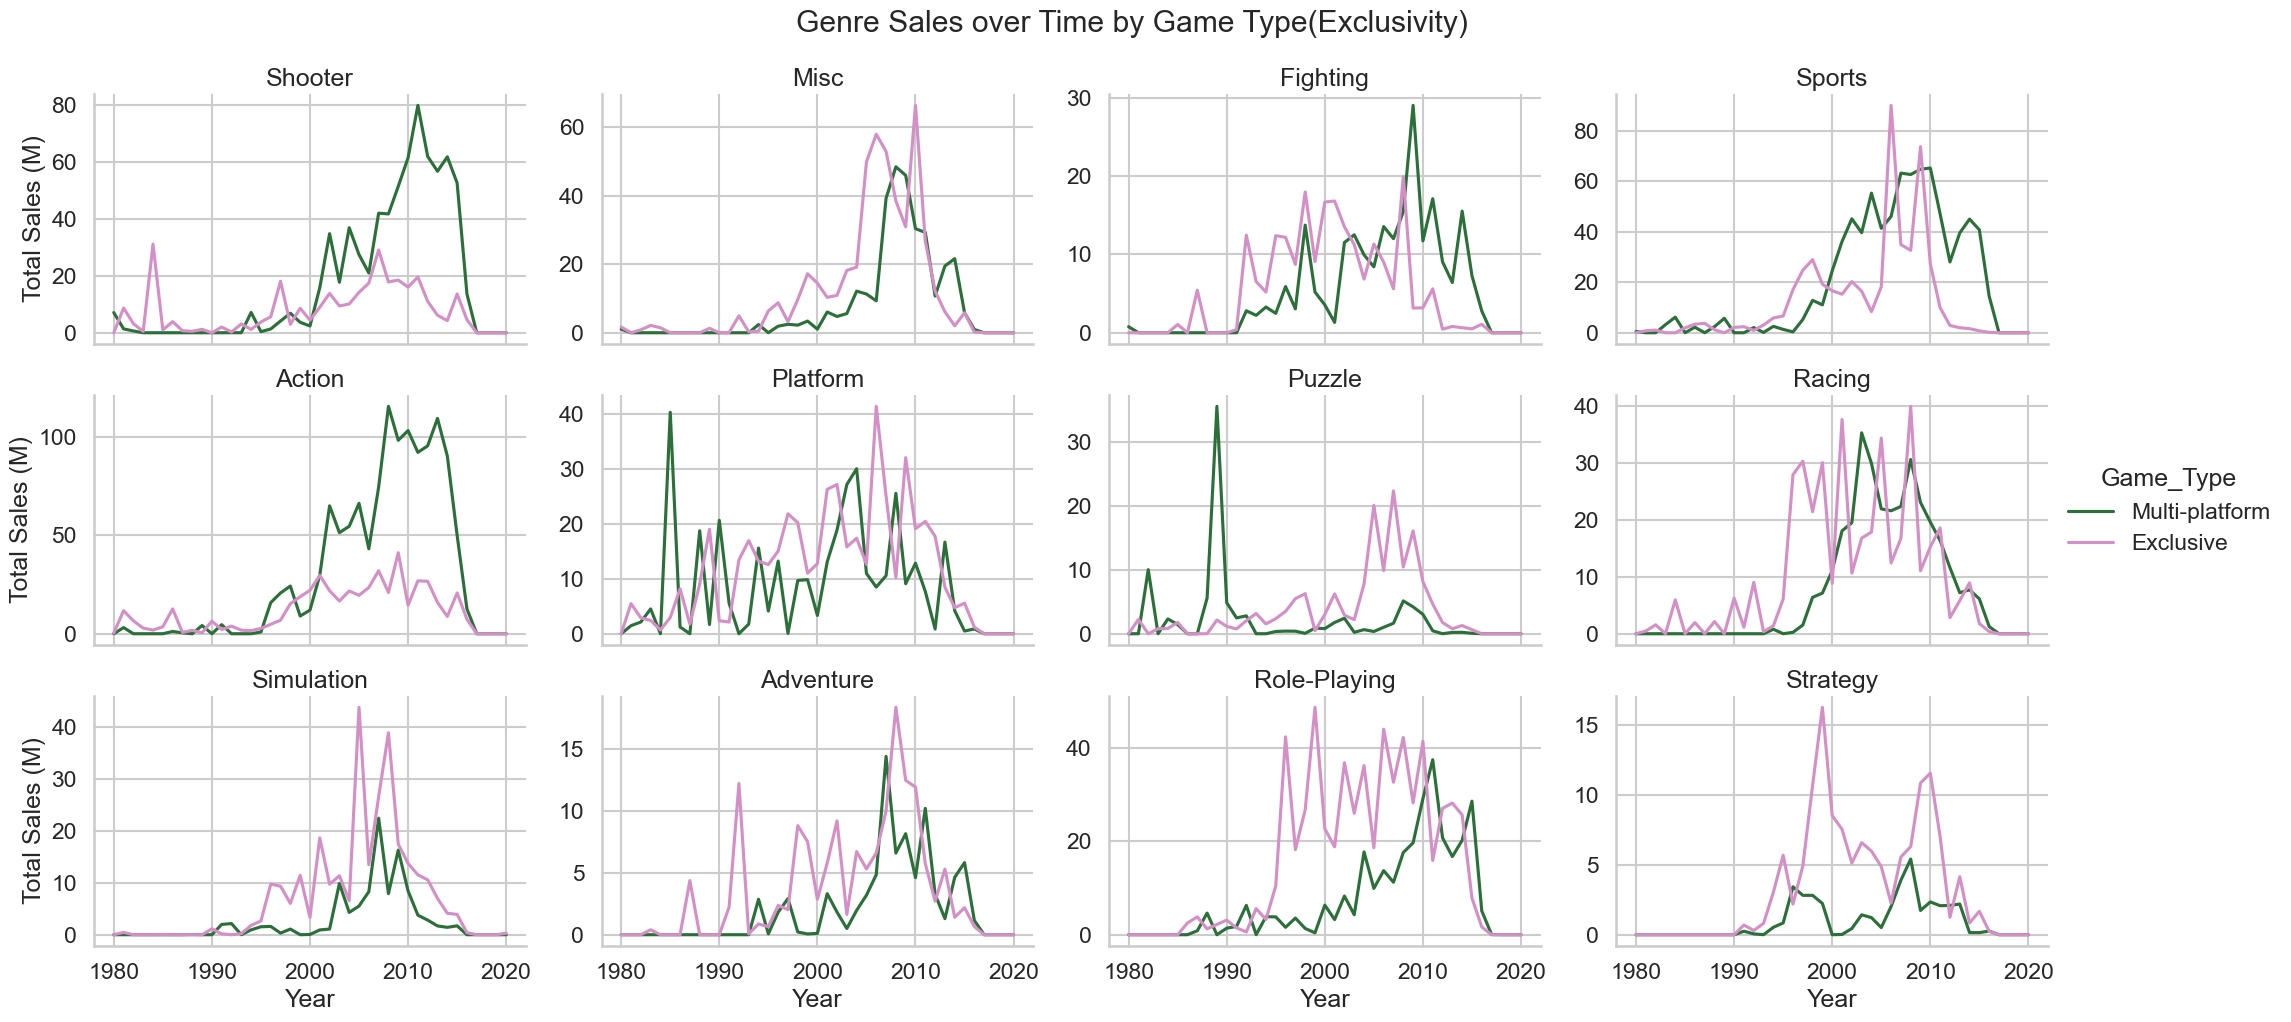

In [64]:
sales_per_genre_and_exclusivity_over_time["Game_Type"] = sales_per_genre_and_exclusivity_over_time["Exclusive"].map({
    0: "Multi-platform", 
    1: "Exclusive"
})

grid = sns.FacetGrid(sales_per_genre_and_exclusivity_over_time, col = "Genre", col_wrap = 4, hue = "Game_Type", sharey = False, height = 3.5, aspect = 1.5, palette = "cubehelix")
grid.map(sns.lineplot, "Year", "Global_Sales")
grid.add_legend()
grid.set_titles("{col_name}")
grid.set_axis_labels("Year", "Total Sales (M)")
plt.subplots_adjust(top = 0.9)
grid.fig.suptitle("Genre Sales over Time by Game Type(Exclusivity)")
plt.show

* **Observation:** Multi-platform games outperformed exclusives in most genres over time, especially in popular genres like Action, Shooter and Sports, where sales peaked in the mid 2000s to early 2010s. Regardless, particularly in the 1990s and early 2000s, exclusives continued to have a competitive advantage in genres like Role-playing, Platform, and Simulation. With both game types trading peaks at different times. Fighting, Racing, and Misc genres displayed more evenly distributed competition. Overall, niche categories like Strategy, Adventure, and Puzzle games stayed smaller, but exclusives frequently performed better than their multi-platform counterparts.

* **Interpretation:** Trends demonstrate that by reaching more players, multi-platform releases typically capture larger markets, providing them with an edge in highly sought-after genres like Action, Shooter, Sports. However, the popularity of exclusives in Simulation, Platform, and Role-playing games indicates that some genres benefit from special experiences connected to particular fan bases or consoles. The fair competition in genres such as Racing, Fighting, and Misc illustrates how audience tastes can change based on console cycles or iconic games. Due to devoted communities and platform-driven innovation, exclusives frequently outperformed for niche genres like Strategy, Adventure, and Puzzle. In general, mass-market success is driven by multi-platform accessibility, whereas exclusivity shapes loyalty in particular genres.

* **Insight:** Publishers should give multi-platform releases in popular genres top priority for long-term commercial success in order to optimize reach and income. In genres like Role-playing, Platform, and Simulation, however, where exclusive experiences linked to a console can foster strong brand loyalty and boost hardware sales, exclusives continue to hold strategic value. Niche genres like Strategy, Adventure, and Puzzle are ideal for building devoted communities because they demonstrate how exclusivity can maintain devoted fan bases even in the absence of blockbuster numbers. Companies can gain market share and foster client loyalty by striking a balance between wide accessibility and carefully selected exclusives. 